# 1. Data preprocessing. (general)

In [ ]:
import pandas as pd
import numpy as np
import glob as glob


### Reads hdb

read_files=glob.glob(r'C:\Users\Gedas\Desktop\INM433.Project\20161216 Poker Player clustering\1. Raw Data\holdempot\*\hdb')

with open("HDB.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

### Reads rooster files into one txt file. 

read_files=glob.glob(r'C:\Users\Gedas\Desktop\INM433.Project\20161216 Poker Player clustering\1. Raw Data\holdempot\*\hrooster')

with open("hrooster.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())
            
### Reads pdb hands into one txt file.

read_files=glob.glob(r'C:\Users\Gedas\Desktop\INM433.Project\20161216 Poker Player clustering\1. Raw Data\holdempot\*\pdb\*')

with open("pdb.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

## 1.1 Preprocessing of players database (pdb) 

In [2]:
import pandas as pd
import numpy as np
import glob as glob

In [4]:
pdb_RAW = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\20161216 Poker Player clustering\2. Uploaded data\INM433_PDB_RAW_DATA_TABLE.csv', dtype={'NAME_ID':str, 'PRFLOP_A': str, 'PRTURN_A': str, 'PRRIVER_A':str, 'PRSHDW':str, 'POCKETCARD_1':str, 'POCKETCARD_2':str} )

In [5]:
pdb_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922663 entries, 0 to 8922662
Data columns (total 13 columns):
NAME_ID         object
TIMESTAMP_ID    int64
PLAYERS_POS     int64
PLAYERS_N       int64
PRFLOP_A        object
PRTURN_A        object
PRRIVER_A       object
PRSHWD_A        object
BANKROLL        int64
ACTION          int64
WINNINGS        int64
POCKETCARD_1    object
POCKETCARD_2    object
dtypes: int64(6), object(7)
memory usage: 885.0+ MB


In [6]:
pdb_RAW.set_index(['TIMESTAMP_ID', 'NAME_ID'], inplace=True) ## Set two level indexing


In [7]:
pdb_RAW.PRFLOP_A.unique() ## List unique actions preflop

array(['Bc', 'B', 'Br', 'Bf', 'f', 'c', 'rc', 'r', 'Bk', 'Brc', 'Bcc',
       'Bcf', 'BQ', 'Bcr', 'Bcrc', 'rf', 'cf', 'Q', 'cc', 'Brr', 'Brf',
       'cr', 'BfQ', 'fQ', 'crf', 'BKQ', 'KQ', 'BcrcA', 'cfQ', 'BcQ', 'rr',
       'ccc', 'ccf', 'cKQ', 'KQQ', 'Brrf', 'BrQ', 'rQ', 'cQ', 'fKQ', 'BrA',
       'Brrc', 'BKQQ', 'BrKQ', 'BrrrQ', 'crc', 'crr', 'Brrr', 'BrrQ',
       'ccA', 'rrrA', 'BQQ', 'QQ', 'BrrcA', 'rcc', 'rrc', 'fQQ', 'Brrrc',
       'Bccc', 'rA', 'BrrA', 'QQQ', 'KQQQQQQ', 'BfQQ', 'crA', 'cA', 'rrf',
       'KQQQ', 'rrcA', 'rrr', 'rrrc', 'rrrr', 'Bcrr', 'BrQQ', 'rrrcA',
       'rcf', 'rrA', 'rcA', 'cQQ', 'BcKQ', 'BcA', 'Brcf', 'cQQQQ', 'Bccf',
       'BcfQ', 'BccA', 'BrrrA', 'ccQQ', 'BcQQ', 'BQQQQ', 'BrrrcA', 'Bcrrr',
       'BQQQ', 'cQQQ', 'cfQQ', 'fQQQQ', 'BcrrrA', 'Brrrf', 'BrrrrQ',
       'BrrrrA', 'Brrrrf', 'rQQ', 'fQQQ', 'BrrrrrA', 'BKQQQ', 'Brcc',
       'BQQQQQ', 'BrcA', 'Brrrr', 'ccr', 'crcA', 'cccA', 'rrrrr', 'Brrrrc',
       'crrc', 'rKQ', 'Bcrf', 'BA', 'Bcrrc', 'crrA

In [8]:
pd.value_counts(pdb_RAW['PRFLOP_A'].values, sort=False) ## Count unique values

# Q actions are outliers.

cKQ            221
Bcrf             9
Bccc            60
BrrrcA          22
Brc          28118
rrf             16
BcrrA            1
cQQ             17
crrr             6
Bcc          73452
BcfQ             3
rrc            475
Brrrrrf          1
rc           64125
Brrrc          125
ccA             16
cQQQQ            1
crrc            13
crcA            13
Bf         1212270
cQ             582
crA             20
Brrrr           64
fQQQQ            1
BrrQ             4
rrrf             1
Brrrrf          21
BKQ           2923
BAQ              1
rrr            119
            ...   
ccrA             1
cccf             5
Bcrrr            2
BcrA             2
BcKQ            14
crrrA            2
BrrA            29
Bk          703687
QQQ             13
Bcf          14411
cccc             2
BcQQ             3
BrQ            168
BrrrrrA         11
Q            27260
Brr           4683
rcc            247
rrcA            26
crf             82
BrfQ             2
BA              35
cccA        

In [9]:
pdb_RAW.sort_index(level=1, inplace=True)

In [10]:
pdb_NAMEC = pdb_RAW[['PLAYERS_POS']].groupby([pdb_RAW.index.get_level_values(1)]).count()  ## Count hands played by a player.


In [11]:
pdb_NAMEC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4892 entries, A2000 to ||
Data columns (total 1 columns):
PLAYERS_POS    4892 non-null int64
dtypes: int64(1)
memory usage: 76.4+ KB


In [12]:
### FIRST TRANSFORMATION. COUNT NAME 

PDB_FULL= pd.merge(pdb_RAW, pdb_NAMEC, right_index=True, left_index=True, how='outer') ## FIRST TRANSFORMATION. COUNT NAME 

In [13]:
PDB_FULL.rename(columns={'PLAYERS_POS_x': 'PLAYER_POS', 'PLAYERS_POS_y': 'HAND_COUNT'}, inplace=True)

In [14]:
PDB_FULL = PDB_FULL[PDB_FULL.HAND_COUNT >= 100]     ## Leave only players for which there is at least 100 hands of data.

In [15]:
PDB_FULL.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8858927 entries, (889674998, A2000) to (836973792, ||)
Data columns (total 12 columns):
PLAYER_POS      int64
PLAYERS_N       int64
PRFLOP_A        object
PRTURN_A        object
PRRIVER_A       object
PRSHWD_A        object
BANKROLL        int64
ACTION          int64
WINNINGS        int64
POCKETCARD_1    object
POCKETCARD_2    object
HAND_COUNT      int64
dtypes: int64(6), object(6)
memory usage: 878.6+ MB


In [16]:
pdb_NAMEC = PDB_FULL[['PLAYER_POS']].groupby([PDB_FULL.index.get_level_values(1)]).count()  ## Compare number of players

pdb_NAMEC.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, A2000 to ||
Data columns (total 1 columns):
PLAYER_POS    3284 non-null int64
dtypes: int64(1)
memory usage: 51.3+ KB


Number of players decreased from 4892 to 3284, though only a little more than 100k hands of data lost, out of 9M.

In [17]:
del pdb_NAMEC ## Release memory.

## 1.2 Operations. (transform)

In [18]:
### Dummies for aggresive (raise + bet) action at different stages of poker hand

PDB_FULL['PRFLOP_AGRO']=PDB_FULL['PRFLOP_A'].str.contains('[rbA]+', regex=True).astype(int)
PDB_FULL['PRTURN_AGRO']=PDB_FULL['PRTURN_A'].str.contains('[rbA]+', regex=True).astype(int)
PDB_FULL['PRRIVER_AGRO']=PDB_FULL['PRRIVER_A'].str.contains('[rbA]+', regex=True).astype(int)
PDB_FULL['PRSHWD_AGRO']=PDB_FULL['PRSHWD_A'].str.contains('[rbA]+', regex=True).astype(int)


In [19]:
### Dummies for passive action (call,check) at different stages of poker hand.

PDB_FULL['PRFLOP_PASS']=PDB_FULL['PRFLOP_A'].str.contains('[ck]+', regex=True).astype(int)
PDB_FULL['PRTURN_PASS']=PDB_FULL['PRTURN_A'].str.contains('[ck]+', regex=True).astype(int)
PDB_FULL['PRRIVER_PASS']=PDB_FULL['PRRIVER_A'].str.contains('[ck]+', regex=True).astype(int)
PDB_FULL['PRSHWD_PASS']=PDB_FULL['PRSHWD_A'].str.contains('[ck]+', regex=True).astype(int)


In [20]:
### Dummies for voluntary enter into hand. (not fold; not blind)

PDB_FULL['PRFLOP_VP']=PDB_FULL['PRFLOP_A'].str.contains('^[^fBQ]', regex=True).astype(int)


In [21]:
### Dummie for preflop raise. (r)

PDB_FULL['PRFLOP_RAISE']=PDB_FULL['PRFLOP_A'].str.contains('[r]+', regex=True).astype(int)



In [22]:
### Dummies for deceptiveness (alternate in action types)

PDB_FULL['PRFLOP_decept']=PDB_FULL['PRFLOP_A'].str.contains('(bf)|(rf)|(cr)|(kr)|(kA)', regex=True).astype(int)
PDB_FULL['PRTURN_decept']=PDB_FULL['PRTURN_A'].str.contains('(bf)|(rf)|(cr)|(kr)|(kA)', regex=True).astype(int)
PDB_FULL['PRRIVER_decept']=PDB_FULL['PRRIVER_A'].str.contains('(bf)|(rf)|(cr)|(kr)|(kA)', regex=True).astype(int)
PDB_FULL['PRSHWD_decept']=PDB_FULL['PRSHWD_A'].str.contains('(bf)|(rf)|(cr)|(kr)|(kA)', regex=True).astype(int)


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [23]:
### Dummies for shdwn action. (pocket card 1 (or 2) contains character)

PDB_FULL.replace(np.nan, '-', regex=True, inplace=True)

PDB_FULL['WTSHDW']=PDB_FULL['POCKETCARD_1'].str.contains('\w+', regex=True).astype(int)



Above where the preperation for transformations, bellow every cell is for creation of our wanted variables.

In [24]:
### AF (agression factor)

PDB_FULL['AGRO_H']= PDB_FULL.loc[:, 'PRFLOP_AGRO':'PRSHWD_AGRO'].sum(axis=1) ## Sum of dummies for aggresive action.
PDB_FULL['AGRO_N'] = PDB_FULL[['AGRO_H']].groupby(level=1).transform('sum')  ## Count stages played agresively by a player.

PDB_FULL['HAND_PASS']= PDB_FULL.loc[:, ['PRFLOP_PASS', 'PRTURN_PASS', 'PRRIVER_PASS', 'PRSHWD_PASS']].sum(axis=1) ## Sum of dummies for passive action.
PDB_FULL['PASS_N'] = PDB_FULL[['HAND_PASS']].groupby(level=1).transform('sum')  ## Count stages played passively by a player.

PDB_FULL['AF'] =PDB_FULL['AGRO_N']/PDB_FULL['PASS_N'] ## AGGRESSION FACTOR

In [25]:
### VPIP (voluntarily put money in the flop)

PDB_FULL['VPIP']=PDB_FULL['PRFLOP_VP'].groupby(level=1).transform('sum')/PDB_FULL['HAND_COUNT']



In [26]:
### PFR (PRFLOP RAISE) *Hand count used instead of VPIP.

PDB_FULL['PFR']=PDB_FULL['PRFLOP_RAISE'].groupby(level=1).transform('sum')/PDB_FULL['HAND_COUNT']

In [27]:
### DECEPT (preperation)

PDB_FULL['PRFLOP_PLAYED']=PDB_FULL['PRFLOP_A'].str.contains('\w+', regex=True).astype(int)
PDB_FULL['PRTURN_PLAYED']=PDB_FULL['PRTURN_A'].str.contains('\w+', regex=True).astype(int)
PDB_FULL['PRRIVER_PLAYED']=PDB_FULL['PRRIVER_A'].str.contains('\w+', regex=True).astype(int)
PDB_FULL['PRSHWD_PLAYED']=PDB_FULL['PRSHWD_A'].str.contains('\w+', regex=True).astype(int)
PDB_FULL['STAGES_PLAYED_H'] = PDB_FULL.loc[:, ['PRFLOP_PLAYED', 'PRTURN_PLAYED', 'PRRIVER_PLAYED', 'PRSHWD_PLAYED']].sum(axis=1) ## Sum of dumies for deceptive action
PDB_FULL['STAGES_PLAYED']= PDB_FULL['STAGES_PLAYED_H'].groupby(level=1).transform('sum')

In [28]:
### DECEPT (derivation, proportion of stages, actions were opposite in the same stage)

PDB_FULL['HAND_DECEPT'] = PDB_FULL.loc[:, ['PRFLOP_decept', 'PRTURN_decept', 'PRRIVER_decept', 'PRSHWD_decept']].sum(axis=1) ## Sum of dumies for deceptive action
PDB_FULL['DECEPT_N'] = PDB_FULL['HAND_DECEPT'].groupby(level=1).transform('sum') ## Count stages played deceptively by a player.

PDB_FULL['DECEPT'] = PDB_FULL['DECEPT_N']/PDB_FULL['STAGES_PLAYED']

In [29]:
### COMMPROP (stack commited in relation to bankroll)

PDB_FULL['COMMPROP_H']=PDB_FULL['ACTION']/PDB_FULL['BANKROLL']
PDB_FULL['COMMPROP'] = PDB_FULL['COMMPROP_H'].groupby(level=1).transform('mean')

In [30]:
### WENTSHWD (proportion of hands went to showdown)

PDB_FULL['WSHWD']=PDB_FULL['WTSHDW'].groupby(level=1).transform('sum')/PDB_FULL['PRFLOP_VP'].groupby(level=1).transform('sum')

In [ ]:
PDB_FULL.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8858927 entries, (889674998, A2000) to (836973792, ||)
Data columns (total 46 columns):
PLAYER_POS         int64
PLAYERS_N          int64
PRFLOP_A           object
PRTURN_A           object
PRRIVER_A          object
PRSHWD_A           object
BANKROLL           int64
ACTION             int64
WINNINGS           int64
POCKETCARD_1       object
POCKETCARD_2       object
HAND_COUNT         int64
PRFLOP_AGRO        int32
PRTURN_AGRO        int32
PRRIVER_AGRO       int32
PRSHWD_AGRO        int32
PRFLOP_PASS        int32
PRTURN_PASS        int32
PRRIVER_PASS       int32
PRSHWD_PASS        int32
PRFLOP_VP          int32
PRFLOP_RAISE       int32
PRFLOP_decept      int32
PRTURN_decept      int32
PRRIVER_decept     int32
PRSHWD_decept      int32
WTSHDW             int32
AGRO_H             int64
AGRO_N             int64
HAND_PASS          int64
PASS_N             int64
AF                 float64
VPIP               float64
PFR                float64


In [ ]:
### WINNINGS PER HAND

PDB_FULL['PROFIT_H'] = PDB_FULL['WINNINGS']-PDB_FULL['ACTION']

PDB_FULL['PROFIT_per_HAND'] = PDB_FULL['PROFIT_H'].groupby(level=1).transform('sum')/PDB_FULL['PRFLOP_VP'].groupby(level=1).transform('sum')

In [ ]:
### RETURN ON INVESTMENT (discarded)

# PDB_FULL['ROI_H']=PDB_FULL['PROFIT_H']/PDB_FULL['ACTION']
# PDB_FULL['ROI']=PDB_FULL['ROI_H'].groupby(level=1).transform('mean')

In [ ]:
### TOTAL PROFIT

PDB_FULL['TOTAL_PROFIT']= PDB_FULL['PROFIT_H'].groupby(level=1).transform('sum')

In [ ]:
### TWO EXTRA TRANSFORMATIONS

PDB_FULL['POS_mean']= PDB_FULL['PLAYER_POS'].groupby(level=1).transform('mean')
PDB_FULL['PLAYERSn_mean']= PDB_FULL['PLAYERS_N'].groupby(level-1).transform('mean')

In [ ]:
### CREATE CROSS SECTIONAL PLAYER DATAFRAME

PDB_FULL = PDB_FULL.reset_index()

PDB_FULL.sort_values(by=['NAME_ID'], inplace=True)

PDB_FULL_C = PDB_FULL.drop_duplicates(subset='NAME_ID')

In [ ]:
### ONE MORE FEATURE POS_to_N

PDB_FULL['POS_to_N'] = PDB_FULL['POS_mean']/PDB_FULL['PLAYERSn_mean']

In [ ]:
PDB= PDB_FULL_C.loc[:, ['NAME_ID','AGRO_N', 'PASS_N','DECEPT_N', 'STAGES_PLAYED', 'AF', 'VPIP', 'PFR',\
                       'DECEPT', 'COMMPROP','WSHWD', 'PROFIT_per_HAND', 'ROI', 'HAND_COUNT','POS_mean', 'PLAYERSn_mode']]


In [ ]:
### WRITE DATA FRAME INTO CSV FOR EXPLORATION

PDB.to_csv(PDB.csv)

# 2. Analysis

Exploration had been done in tableau. Now analysis, is going to be seperated in three parts. 1. 4 Clusters according to Borer (2007): VPIP, AF, PFR 2. Try several K for clustering according to Authors' view: DECEPT; COMMPROP; WSHWD. 3. PCA + K-MEANS clustering on all 6 variables. All models evaluated using Silhoutee score; best ones visualized using voronoi diagrams; evaluated according to return measures, distribution plots of returns found. Dashboard created in tableau.

### 2.0 Transormations

In [ ]:
import pandas as pd
import numpy as np
import glob as glob

In [27]:
data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\PDB2.csv')



In [4]:
data=data.drop(['Unnamed: 0'], axis=1)

Outliers are being investigated after first K-clustering run, an observation of a very sparse cluster, comming from AF variable. 

There are some infinite values in ROI column, which results in failure to draw histograms. There are 19 observations in total. We decided to go back to full data set to investigate those rows in more detail. 17 from ROI, two trom COMMPROP. 

Potential reason , had not been found, apart from observation that COMMPROP of inf, comes from two agents of very similar IDs: B25, B52.

We were unable to find what lead to ROI being inf.

However, after careful consideration, ROI variable is discarded, because there is a lot values when ROI is -1, even though amounts are insignificant. Profit per voluntary hand, and total winnings are left, as better alternatives to investigate profitability. (one absolute, one relative) Also, went to showdown proportion calculated to voluntary put money in the pot rather , than hands played.


In [77]:
data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\PDB3.csv')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 17 columns):
NAME_ID             3284 non-null object
AGRO_N              3284 non-null int64
PASS_N              3284 non-null int64
DECEPT_N            3284 non-null int64
STAGES_PLAYED       3284 non-null int64
AF                  3284 non-null float64
VPIP                3284 non-null float64
PFR                 3284 non-null float64
DECEPT              3284 non-null float64
COMMPROP            3284 non-null float64
WSHWD               3284 non-null float64
PROFIT_per_VHAND    3284 non-null float64
TOTAL_PROFIT        3284 non-null int64
HAND_COUNT          3284 non-null int64
POS_mean            3284 non-null float64
PLAYERSn_mean       3284 non-null float64
POS_to_N            3284 non-null float64
dtypes: float64(10), int64(6), object(1)
memory usage: 436.2+ KB


In [78]:
### NA values

data=data.replace([np.inf, -np.inf], np.nan)

data.isnull().sum()

## Sort infinities as there is some in ROI column (replace with nan, which data frame operations handles better)


Unnamed: 0          0
NAME_ID             0
AGRO_N              0
PASS_N              0
DECEPT_N            0
STAGES_PLAYED       0
AF                  0
VPIP                0
PFR                 0
DECEPT              0
COMMPROP            2
WSHWD               5
PROFIT_per_VHAND    5
TOTAL_PROFIT        0
HAND_COUNT          0
POS_mean            0
PLAYERSn_mean       0
POS_to_N            0
dtype: int64

In [7]:
### Get data-fram as slice of full frame, where there are nan values.

data_null=data[data.isnull().any(axis=1)]
data_null

,NAME_ID,AGRO_N,PASS_N,DECEPT_N,STAGES_PLAYED,AF,VPIP,PFR,DECEPT,COMMPROP,WSHWD,PROFIT_per_VHAND,TOTAL_PROFIT,HAND_COUNT,POS_mean,PLAYERSn_mean,POS_to_N
33,Actor,68,159,4,337,0.427673,0.000000,0.131148,0.011869,0.019588,NaN,NaN,-4275,183,1.502732,2.000000,0.751366
89,B-25,163,533,1,1443,0.305816,0.317210,0.057368,0.000693,NaN,0.241135,-1.453901,-410,889,3.717660,6.052868,0.614198
90,B-52,12,81,0,201,0.148148,0.274194,0.024194,0.000000,NaN,0.323529,39.205882,1333,124,4.580645,7.500000,0.610753
908,L0veBot,37,140,3,306,0.264286,0.000000,0.028249,0.009804,0.018505,NaN,NaN,-3456,177,1.497175,2.000000,0.748588
2137,cx3,2,6,0,140,0.333333,0.000000,0.007463,0.000000,0.015363,NaN,NaN,-4206,134,3.910448,6.865672,0.569565
2138,cx7,121,39,0,219,3.102564,0.000000,0.540541,0.000000,0.047590,NaN,NaN,-3525,111,1.918919,2.900901,0.661491
2340,gayJesus,47,91,3,230,0.516484,0.000000,0.155405,0.013043,0.026408,NaN,NaN,-2875,148,1.500000,2.000000,0.750000


In [79]:
### Drop rows where any of the columns has na value

data.dropna(axis=0, how='any', inplace=True)

data.isnull().sum()

Unnamed: 0          0
NAME_ID             0
AGRO_N              0
PASS_N              0
DECEPT_N            0
STAGES_PLAYED       0
AF                  0
VPIP                0
PFR                 0
DECEPT              0
COMMPROP            0
WSHWD               0
PROFIT_per_VHAND    0
TOTAL_PROFIT        0
HAND_COUNT          0
POS_mean            0
PLAYERSn_mean       0
POS_to_N            0
dtype: int64

There are 7 samples with nan values in WSHWD, and PROFIT_per_VHAND, mainly arrising as byproduct of low number of total hands played [100, 200]. In these observations VPIP is 0, which could be considered as outlier. However, we discard theese rows before outlier procedure. 

In [9]:
### Scatter matix (more useful  as outliers are investigated)

def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig


In [10]:
### Outliers data frame. (only relevant variables)

data_k = data.loc[:, ['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WSHWD', 'PROFIT_per_VHAND']]

In [80]:
data['isOutlierAF'] = np.where(abs(data['AF'] - data['AF'].mean()) > 3 * data['AF'].std(), np.nan, 0)
data['isOutlierVPIP'] = np.where(abs(data['VPIP'] - data['VPIP'].mean()) > 3 * data['VPIP'].std(), np.nan, 0)
data['isOutlierPFR'] = np.where(abs(data['PFR'] - data['PFR'].mean()) > 3 * data['PFR'].std(), np.nan, 0)
data['isOutlierDECEPT'] = np.where(abs(data['DECEPT'] - data['DECEPT'].mean()) > 3 * data['DECEPT'].std(), np.nan, 0)
data['isOutlierCOMMPROP'] = np.where(abs(data['COMMPROP'] - data['COMMPROP'].mean()) > 3 * data['COMMPROP'].std(), np.nan, 0)
data['isOutlierWSHWD'] = np.where(abs(data['WSHWD'] - data['WSHWD'].mean()) > 3 * data['WSHWD'].std(), np.nan, 0)

In [81]:
### Count rows with at least one outlier.

data_o = data.loc[:, ['isOutlierAF', 'isOutlierVPIP', 'isOutlierPFR', 'isOutlierDECEPT', 'isOutlierCOMMPROP', 'isOutlierWSHWD']]

print(data_o.shape[0] - data_o.count())

isOutlierAF          33
isOutlierVPIP        33
isOutlierPFR         76
isOutlierDECEPT      33
isOutlierCOMMPROP    58
isOutlierWSHWD       22
dtype: int64


In [82]:
### Delete rows with at least one outlier. 

data.dropna(axis=0, how='any', inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3073 entries, 3 to 3283
Data columns (total 24 columns):
Unnamed: 0           3073 non-null int64
NAME_ID              3073 non-null object
AGRO_N               3073 non-null int64
PASS_N               3073 non-null int64
DECEPT_N             3073 non-null int64
STAGES_PLAYED        3073 non-null int64
AF                   3073 non-null float64
VPIP                 3073 non-null float64
PFR                  3073 non-null float64
DECEPT               3073 non-null float64
COMMPROP             3073 non-null float64
WSHWD                3073 non-null float64
PROFIT_per_VHAND     3073 non-null float64
TOTAL_PROFIT         3073 non-null int64
HAND_COUNT           3073 non-null int64
POS_mean             3073 non-null float64
PLAYERSn_mean        3073 non-null float64
POS_to_N             3073 non-null float64
isOutlierAF          3073 non-null float64
isOutlierVPIP        3073 non-null float64
isOutlierPFR         3073 non-null float64
isOut

209 values (3284-3073) had been dropped as outliers.

In [83]:
### Create two more dummies one for winners , one for loosers.

data['WINNER'] = np.where(data['PROFIT_per_VHAND'] > 0, 1, 0)
data['LOOSER'] = np.where(data['PROFIT_per_VHAND'] <= 0, 1, 0)


In [26]:
data_k = data.loc[:, ['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WSHWD', 'PROFIT_per_VHAND', 'TOTAL_PROFIT', 'WINNER', 'LOOSER']]

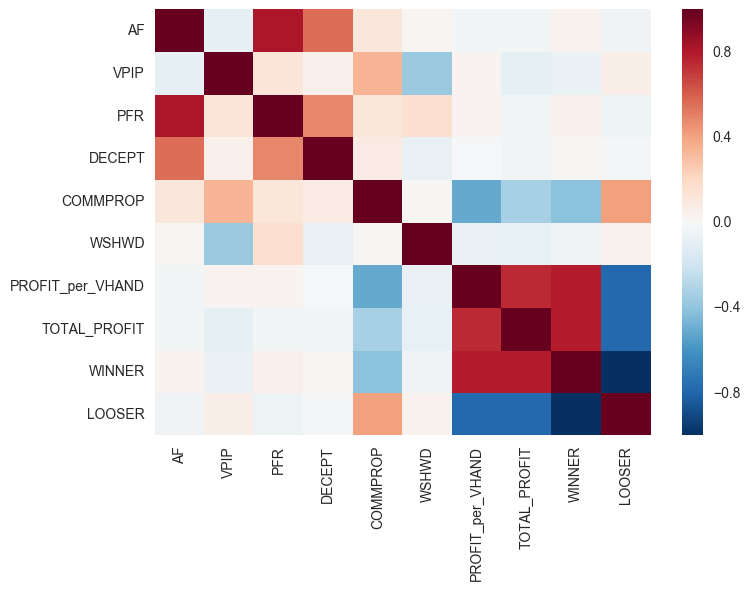

In [27]:
### Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

corr = data_k.corr(method='spearman')

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

Nor profit per hand, nor total profit seems to be correlated with other regressors.

In [19]:
### Histograms

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins='fd',ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


In [29]:
data_k = data.loc[:, ['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WSHWD', 'PROFIT_per_VHAND', 'TOTAL_PROFIT']]

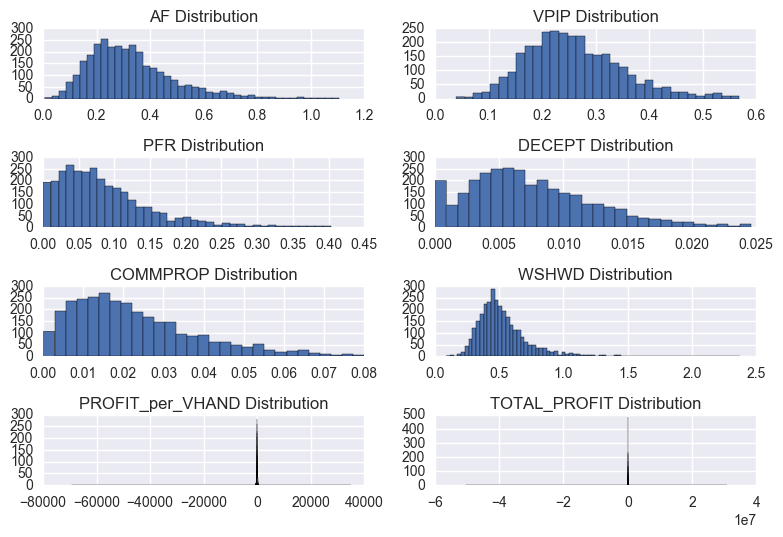

In [38]:
draw_histograms(data_k, data_k.columns, 4,2)

All distributions rightly skewed, as it is common to see in variables with positive only values. 

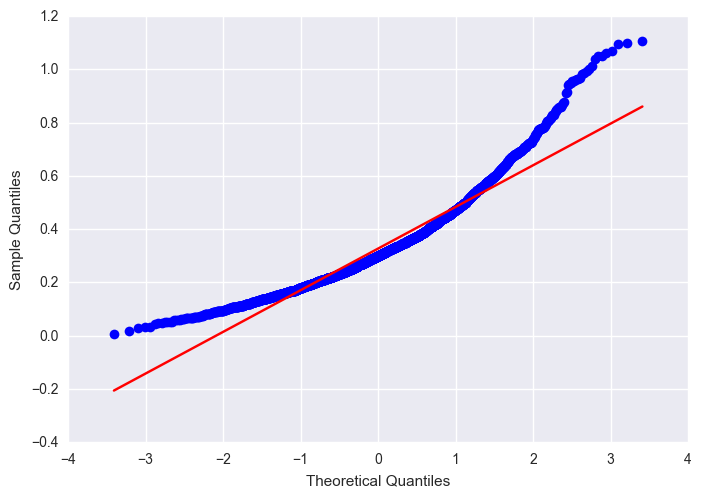

In [32]:
### QQ plots. NORMALITY test 1.

from scipy import stats
import statsmodels.api as sm

fig = sm.qqplot(data['AF'], stats.norm, line = 'r')
plt.show()

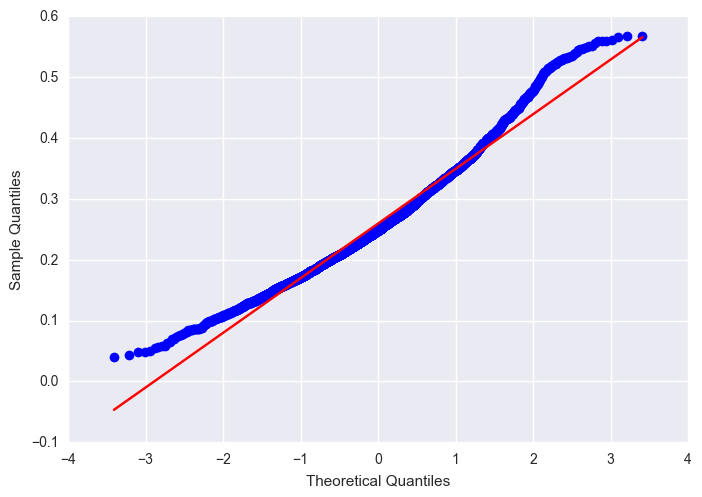

In [33]:
fig = sm.qqplot(data['VPIP'], stats.norm, line = 'r')
plt.show()

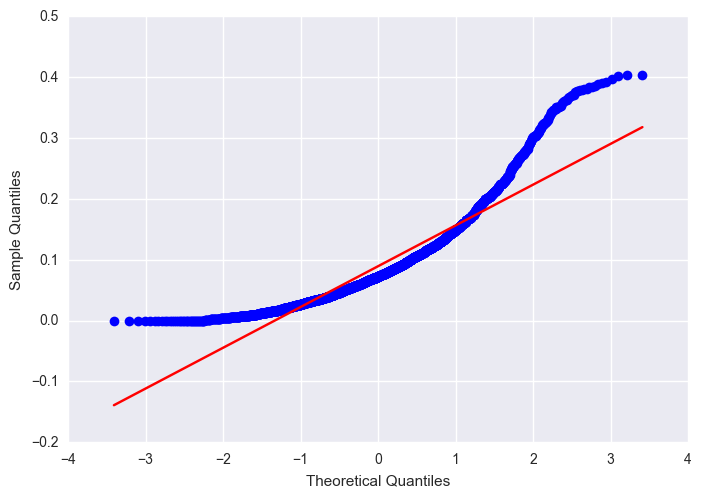

In [34]:
fig = sm.qqplot(data['PFR'], stats.norm, line = 'r')
plt.show()

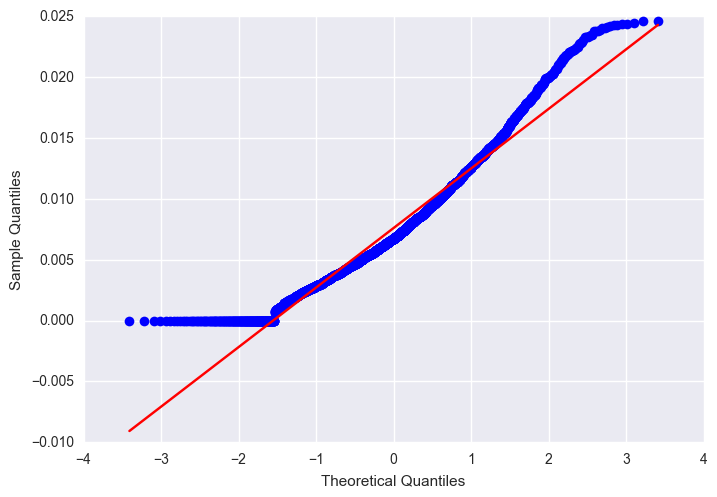

In [35]:
fig = sm.qqplot(data['DECEPT'], stats.norm, line = 'r')
plt.show()

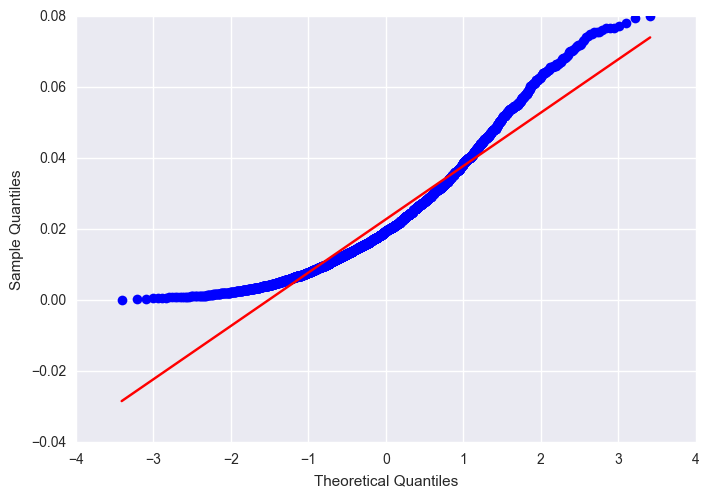

In [36]:
fig = sm.qqplot(data['COMMPROP'], stats.norm, line = 'r')
plt.show()

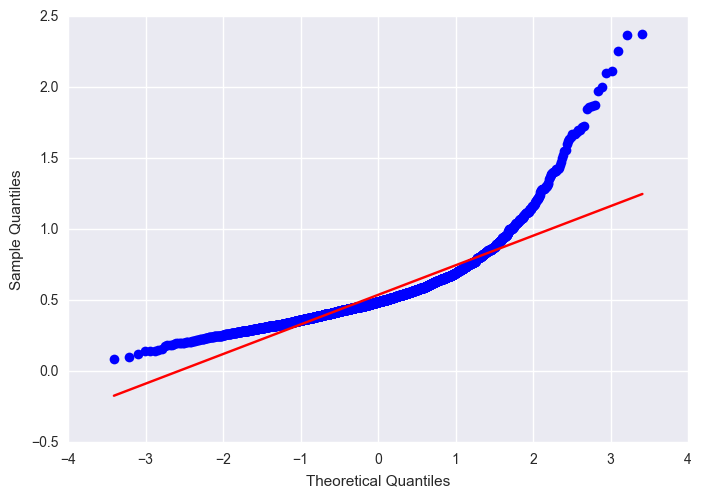

In [37]:
fig = sm.qqplot(data['WSHWD'], stats.norm, line = 'r')
plt.show()

QQ plots confirm skewness. Most deformed is decept distributions, where there is great number of players, that did not show any deceptive action, and there is aslo a lot, that showed deceptivenss more often than expected as if it was normally distributed.

In [40]:
### Wilko-Shapiro test. Normality test 2.

w, p = stats.shapiro(data['AF'])
w2, p2 = stats.shapiro(data['VPIP'])
w3, p3 = stats.shapiro(data['PFR'])
w4, p4 = stats.shapiro(data['DECEPT'])
w5, p5 = stats.shapiro(data['COMMPROP'])
w6, p6 = stats.shapiro(data['WSHWD'])


In [42]:
print (p, p2, p3, p4, p5, p6)


3.3620053201154934e-36 1.52867902216203e-22 1.6815581571897805e-44 8.438958580146461e-30 2.2247615296402298e-36 0.0


Non normality confirmed using wilko-shapiro tests, p values small.

In [84]:
### EXTRA MINOR TRANSFORMATIONS

data.rename(columns={'STAGES_PLAYED': 'STAGES_N', 'HAND_COUNT': 'HANDn_PLAYER'}, inplace=True)

In [85]:
data.to_csv('data.csv')

### 2.1 K-Means  4. (Borer)

In [254]:
### TRANSFORMATION ON WTSHWD to put in the range [0,1]
# data['WTSHWD']=(data['WSHWD']*(data['HANDn_PLAYER']*data['VPIP']))/data['HANDn_PLAYER']

#data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'isOutlierAF', 'isOutlierVPIP', 'isOutlierPFR', 'isOutlierDECEPT', 'isOutlierCOMMPROP', 'isOutlierWSHWD', 'WSHWD'], axis=1)

# data.to_csv('data.csv')

In [255]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [256]:
data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\data.csv')

In [257]:
data = data.loc[:, ['AF', 'VPIP', 'PFR']]
n_samples, n_features = data.shape



In [258]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s  %.2fs  %i  %.3f %.3f' 
         % (name, time()-t0, estimator.inertia_, 
           metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=1000),
           metrics.calinski_harabaz_score(data, estimator.labels_)))


In [259]:
### Lets make couple clusterings

print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia   silhouette   calinski-harabaz')

bench_k_means(KMeans(init='random', n_clusters=4, n_init=10), name='Random', data=data) # Random intialization

bench_k_means(KMeans(init='k-means++', n_clusters=4, n_init=10), name='KMeans++', data=data) # Further away initialization

print(79 * '_')



n_samples 3073, 	 n_features 3
_______________________________________________________________________________
init    time  inertia   silhouette   calinski-harabaz
   Random  0.20s  37  0.324 2307.301
 KMeans++  0.16s  37  0.319 2307.322
_______________________________________________________________________________


KMeans++ faster and a little more accuracte. But, by a very small margin, according to Silhouette. (equal according to calinski-harabaz)

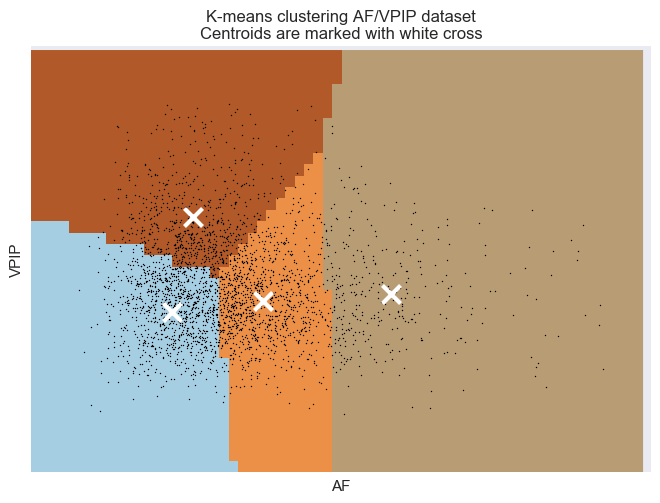

In [260]:
### Visualize three different clusterings. 
### First (AF, VPIP)

reduced_data = data.loc[:, ['AF', 'VPIP']]
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .02 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data.iloc[:, 0].min() - 0.1, reduced_data.iloc[:, 0].max() + 0.1
y_min, y_max = reduced_data.iloc[:, 1].min() - 0.1, reduced_data.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering AF/VPIP dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('AF')
plt.ylabel('VPIP')
plt.xticks(())
plt.yticks(())
plt.show()

Agression much more variant. Red loose_passive; orrange tight_passive; tight agressive; unpredictable agressive. According to this clustering Hellmuths animals, might be a better way to name clusters, rather than Borer's, player types. 

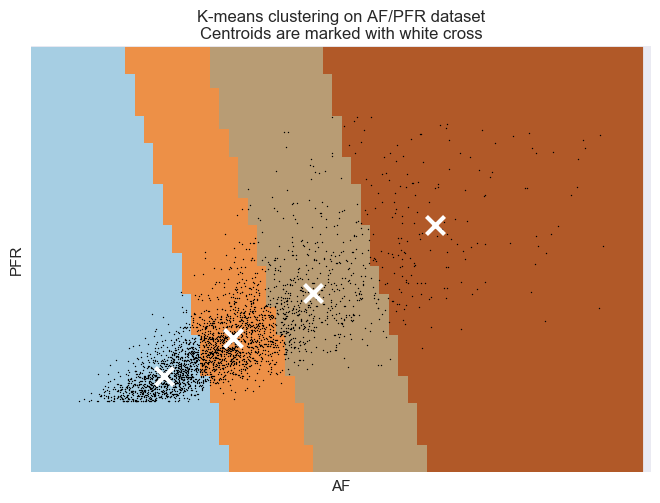

In [261]:
### Second (AF, PFR)

reduced_data = data.loc[:, ['AF', 'PFR']]
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .02 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data.iloc[:, 0].min() - 0.1, reduced_data.iloc[:, 0].max() + 0.1
y_min, y_max = reduced_data.iloc[:, 1].min() - 0.1, reduced_data.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on AF/PFR dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('AF')
plt.ylabel('PFR')
plt.xticks(())
plt.yticks(())
plt.show()

Tight-stable, less-tight-less stable, less-tight-less stable, very unstable. (More right up more aggresive)

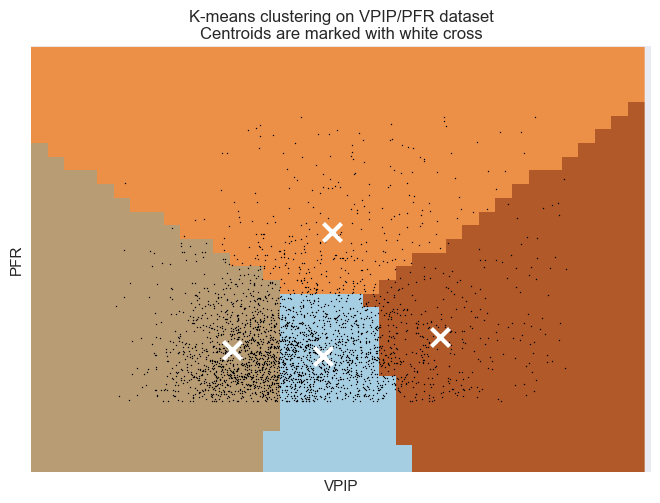

In [262]:
### Third (VPIP, PFR)

reduced_data = data.loc[:, ['VPIP', 'PFR']]
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .02 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data.iloc[:, 0].min() - 0.1, reduced_data.iloc[:, 0].max() + 0.1
y_min, y_max = reduced_data.iloc[:, 1].min() - 0.1, reduced_data.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on VPIP/PFR dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('VPIP')
plt.ylabel('PFR')
plt.xticks(())
plt.yticks(())
plt.show()

Tight-passsive brown; loose-passive gray; orange unpredictable; blue passive-medium tight.

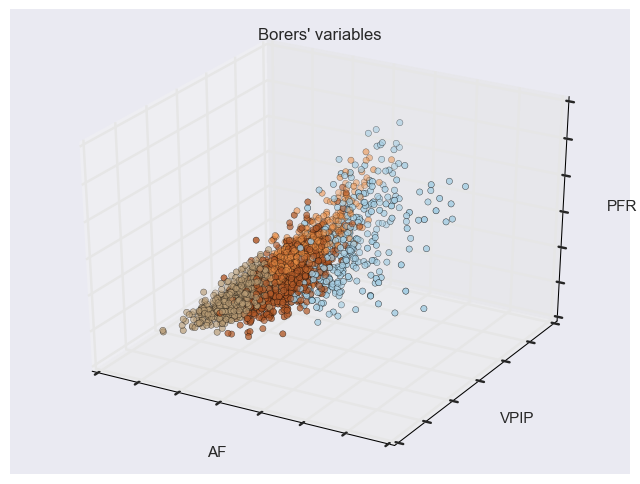

In [263]:
### 3d cube.
from mpl_toolkits.mplot3d import Axes3D


kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=labels, cmap=plt.cm.Paired)
ax.set_title("Borers' variables")
ax.set_xlabel("AF")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("VPIP")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PFR")
ax.w_zaxis.set_ticklabels([])

plt.show()

Difficult to analyze 3d cube here. Different views give different impressions. V-Analytics possibly.

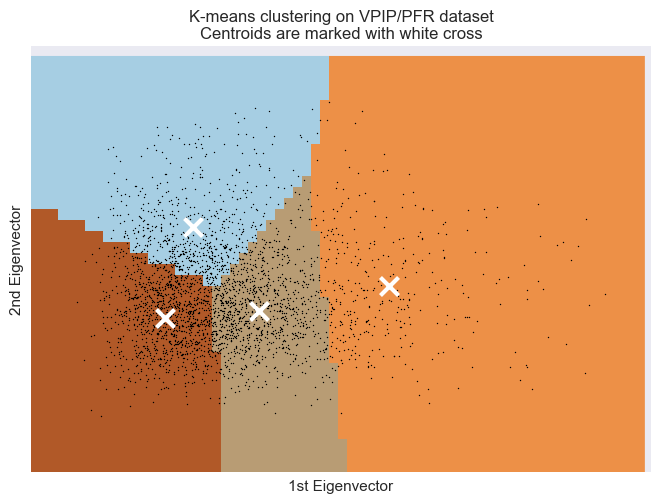

In [264]:
### Voronoi for PCA=2

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .02 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on VPIP/PFR dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('1st Eigenvector')
plt.ylabel('2nd Eigenvector')
plt.xticks(())
plt.yticks(())
plt.show()


In [265]:
### EXPORT FOR VISUALIZATION

kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_

data['Cluster_Borer']= kmeans.labels_

data.to_csv('data_borer.csv')

### 2.2 K-Means n=4,5,8 (my)

In [266]:
data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\data.csv')

data=data.loc[:, ['DECEPT', 'COMMPROP', 'WTSHWD']]


In [267]:
### FIrst run. (K=4)


print('K-Means with n=4, variables Decept, Commprop, WTSHWD')
print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia   silhouette   calinski-harabaz')

bench_k_means(KMeans(init='random', n_clusters=4, n_init=10), name='Random', data=data) # Random intialization

bench_k_means(KMeans(init='k-means++', n_clusters=4, n_init=10), name='KMeans++', data=data) # Further away initialization

print(79 * '_')


K-Means with n=4, variables Decept, Commprop, WTSHWD
n_samples 3073, 	 n_features 3
_______________________________________________________________________________
init    time  inertia   silhouette   calinski-harabaz
   Random  0.17s  1  0.380 4339.342
 KMeans++  0.16s  1  0.375 4339.372
_______________________________________________________________________________


Silhouett, and calinski-harabaz higher than in Brorers'. KMeans++ now much faster. 

In [268]:
### Second run. (K=5)

print('K-Means with n=5, variables Decept, Commprop, WTSHWD')
print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia   silhouette   calinski-harabaz')

bench_k_means(KMeans(init='random', n_clusters=5, n_init=10), name='Random', data=data) # Random intialization

bench_k_means(KMeans(init='k-means++', n_clusters=5, n_init=10), name='KMeans++', data=data) # Further away initialization

print(79 * '_')

K-Means with n=5, variables Decept, Commprop, WTSHWD
n_samples 3073, 	 n_features 3
_______________________________________________________________________________
init    time  inertia   silhouette   calinski-harabaz
   Random  0.27s  1  0.348 4134.162
 KMeans++  0.23s  1  0.348 4134.086
_______________________________________________________________________________


No improvement with 5 clusters. Lower than in 4 clusters.

In [269]:
### Third run. (K=8)

print('K-Means with n=8, variables Decept, Commprop, WTSHWD')
print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia   silhouette   calinski-harabaz')

bench_k_means(KMeans(init='random', n_clusters=8, n_init=10), name='Random', data=data) # Random intialization

bench_k_means(KMeans(init='k-means++', n_clusters=8, n_init=10), name='KMeans++', data=data) # Further away initialization

print(79 * '_')

K-Means with n=8, variables Decept, Commprop, WTSHWD
n_samples 3073, 	 n_features 3
_______________________________________________________________________________
init    time  inertia   silhouette   calinski-harabaz
   Random  0.39s  0  0.329 3703.625
 KMeans++  0.29s  0  0.336 3703.934
_______________________________________________________________________________


Now random took even more time, silhoette lower, but calinski-harabaz higher. Whad does it mean???

In [270]:
### Fourth run. (k=3)

print('K-Means with n=3, variables Decept, Commprop, WTSHWD')
print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia   silhouette   calinski-harabaz')

bench_k_means(KMeans(init='random', n_clusters=3, n_init=10), name='Random', data=data) # Random intialization

bench_k_means(KMeans(init='k-means++', n_clusters=3, n_init=10), name='KMeans++', data=data) # Further away initialization

print(79 * '_')

K-Means with n=3, variables Decept, Commprop, WTSHWD
n_samples 3073, 	 n_features 3
_______________________________________________________________________________
init    time  inertia   silhouette   calinski-harabaz
   Random  0.15s  2  0.425 4382.679
 KMeans++  0.19s  2  0.425 4382.675
_______________________________________________________________________________


Silhouette high, Calinski lower, still higher than in Borers'.

In [271]:
### Fifth run. (k=10)

print('K-Means with n=10, variables Decept, Commprop, WTSHWD')
print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia   silhouette   calinski-harabaz')

bench_k_means(KMeans(init='random', n_clusters=10, n_init=10), name='Random', data=data) # Random intialization

bench_k_means(KMeans(init='k-means++', n_clusters=10, n_init=10), name='KMeans++', data=data) # Further away initialization

print(79 * '_')

K-Means with n=10, variables Decept, Commprop, WTSHWD
n_samples 3073, 	 n_features 3
_______________________________________________________________________________
init    time  inertia   silhouette   calinski-harabaz
   Random  0.57s  0  0.329 3601.267
 KMeans++  0.34s  0  0.307 3610.754
_______________________________________________________________________________


Silhoette increases with less clusters, calinski-harabaz increases up until n=15. We decided to use k=4, to compare with Brorer.

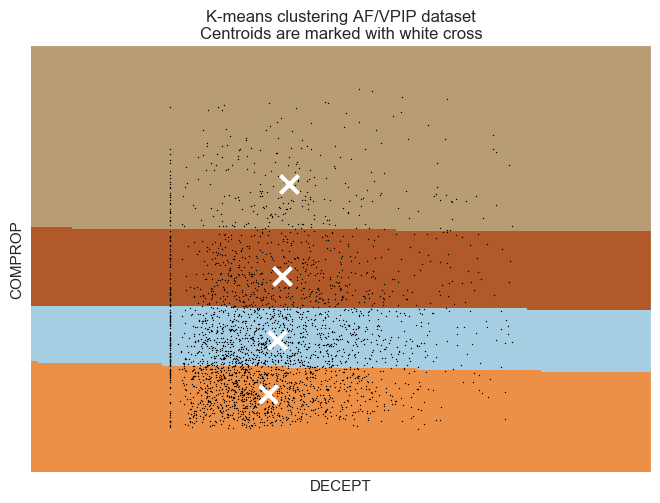

In [272]:
### First voronoi (DECEPT, COMMPROP)

reduced_data = data.loc[:, ['DECEPT', 'COMMPROP']]
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .0005 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data.iloc[:, 0].min() - 0.01, reduced_data.iloc[:, 0].max() + 0.01
y_min, y_max = reduced_data.iloc[:, 1].min() - 0.01, reduced_data.iloc[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering AF/VPIP dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('DECEPT')
plt.ylabel('COMPROP')
plt.xticks(())
plt.yticks(())
plt.show()

Little correlation between variables. A little denser on the left bottom corner, and lots of values for low decept. Blue > careful; orange > opportunistic; brown > average; gray > ultra opportunistic outliers. All four layers fall on whole deceptiveness spectrum.

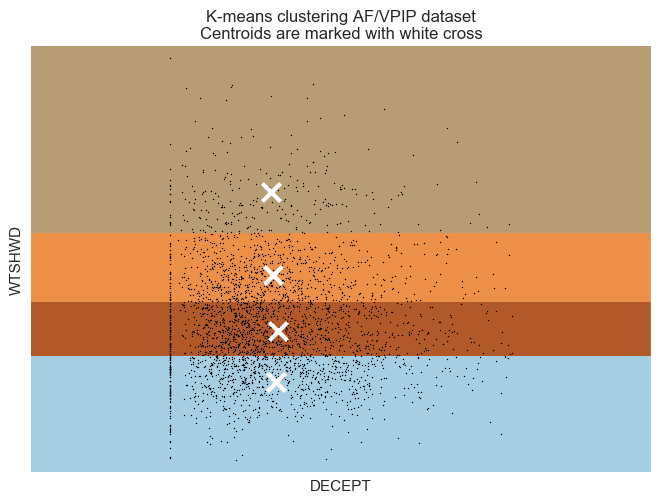

In [273]:
### Second (DECEPT, WTSHWD)

reduced_data = data.loc[:, ['DECEPT', 'WTSHWD']]
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .0005 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data.iloc[:, 0].min() - 0.01, reduced_data.iloc[:, 0].max() + 0.01
y_min, y_max = reduced_data.iloc[:, 1].min() - 0.01, reduced_data.iloc[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering AF/VPIP dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('DECEPT')
plt.ylabel('WTSHWD')
plt.xticks(())
plt.yticks(())
plt.show()

More left dense area. Blue > not competitive; orange > very competitve , likes going till showdown. Deceptiveness decreases a little bit as we go up competitiveness. 

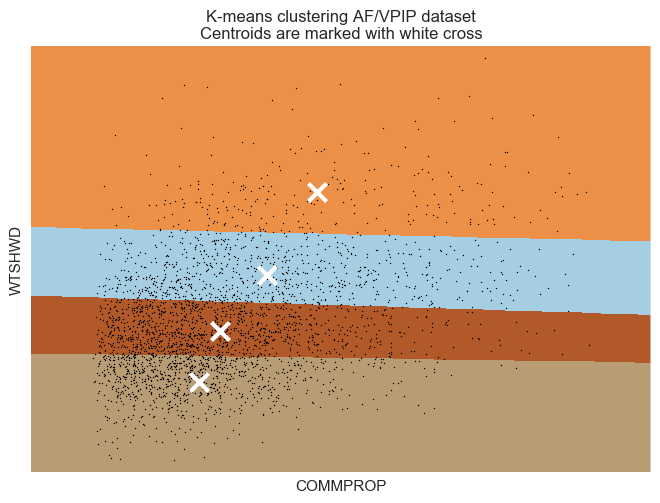

In [274]:
### Third (COMMPROP, WTSHWD)

reduced_data = data.loc[:, ['COMMPROP', 'WTSHWD']]
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .0005 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data.iloc[:, 0].min() - 0.01, reduced_data.iloc[:, 0].max() + 0.01
y_min, y_max = reduced_data.iloc[:, 1].min() - 0.01, reduced_data.iloc[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering AF/VPIP dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('COMMPROP')
plt.ylabel('WTSHWD')
plt.xticks(())
plt.yticks(())
plt.show()

Bottom left corner denser. Slices horizontal. Orange> non compettive; gray > compettive; blue > average; red > ultra compettive outliers.

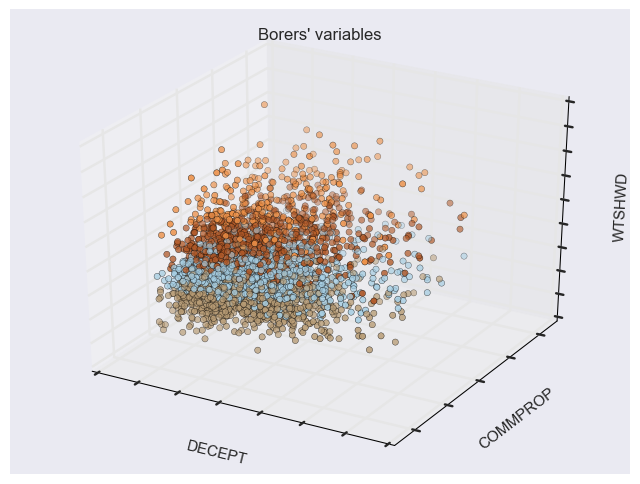

In [275]:
### 3d cube

from mpl_toolkits.mplot3d import Axes3D


kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=labels, cmap=plt.cm.Paired)
ax.set_title("Borers' variables")
ax.set_xlabel("DECEPT")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("COMMPROP")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("WTSHWD")
ax.w_zaxis.set_ticklabels([])

plt.show()

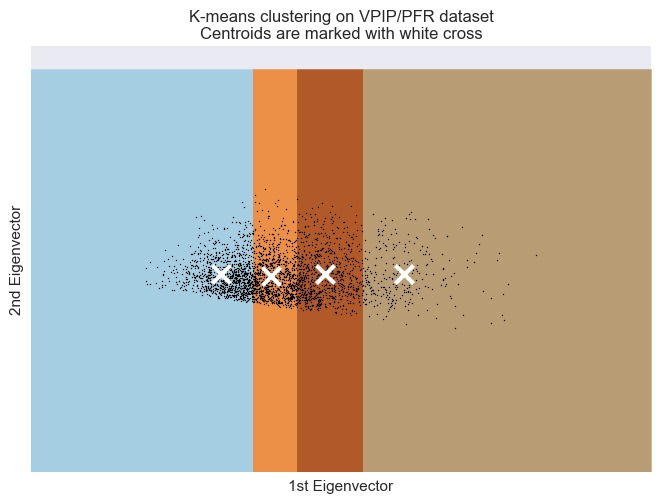

In [276]:
### Voronoi for PCA=2

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .02 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on VPIP/PFR dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('1st Eigenvector')
plt.ylabel('2nd Eigenvector')
plt.xticks(())
plt.yticks(())
plt.show()


In [277]:
### EXPORT FOR VISUALIZATION

kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_

data['Cluster_ME']= kmeans.labels_

data.to_csv('data_ME.csv')

### 2.3 PCA+K-MEANS

In [278]:
data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\data.csv')

data = data.loc[:, ['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WTSHWD']]

In [279]:
### Reduce dimension (PCA=2)

reduced_data = PCA(n_components=2).fit_transform(data)
n_samples, n_features = reduced_data.shape


Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.302684224858


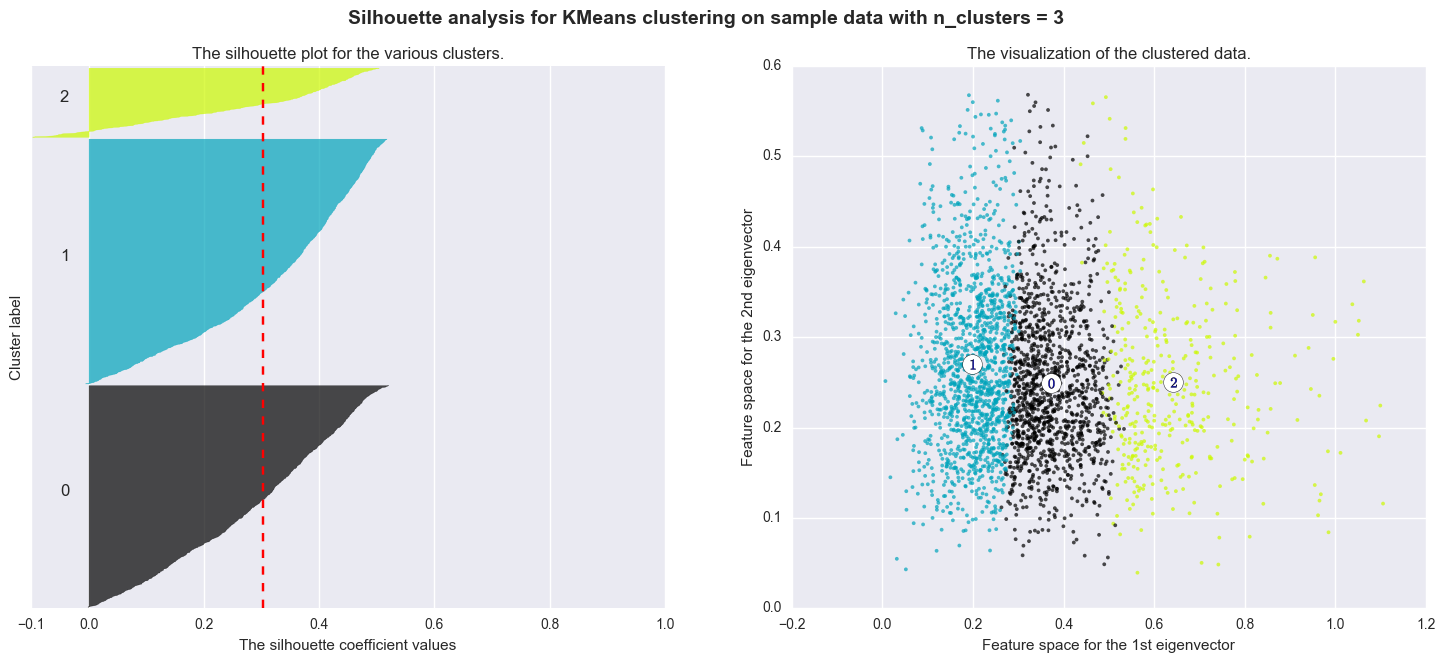

For n_clusters = 4 The average silhouette_score is : 0.303872262409


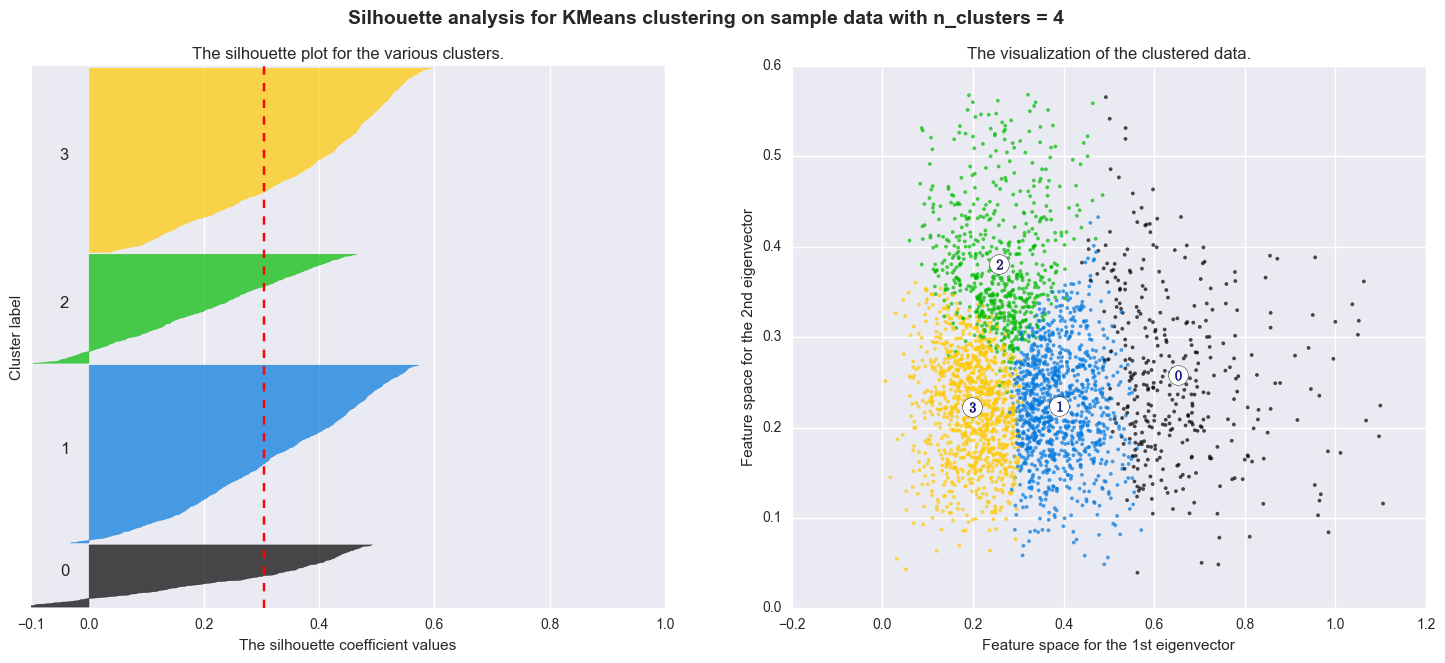

For n_clusters = 5 The average silhouette_score is : 0.273447773458


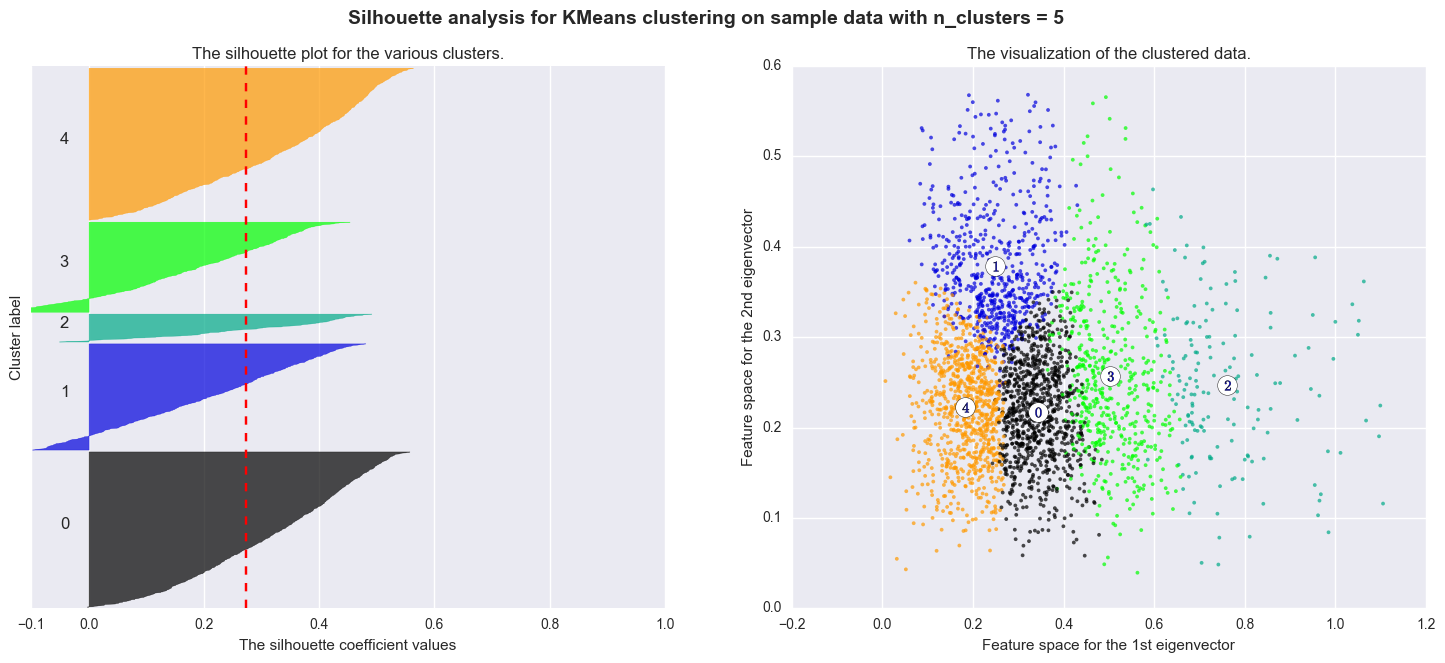

For n_clusters = 8 The average silhouette_score is : 0.255726850627


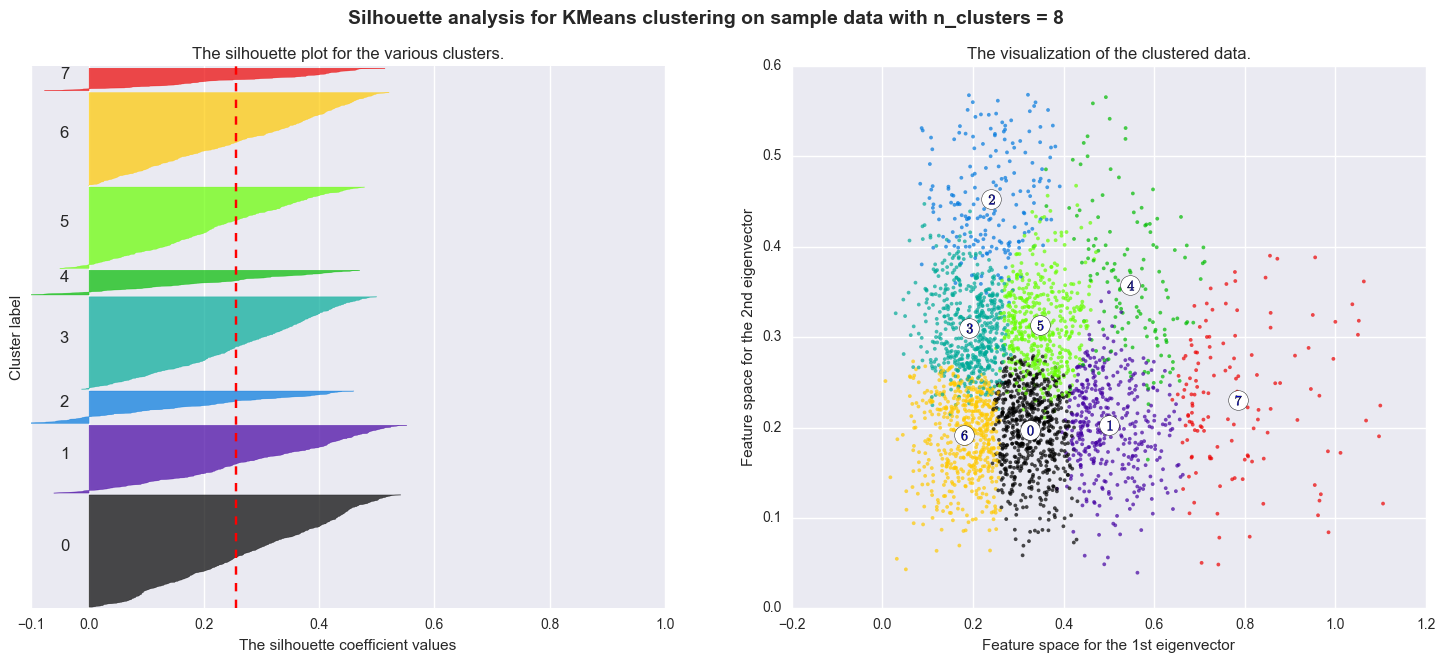

For n_clusters = 10 The average silhouette_score is : 0.245805909968


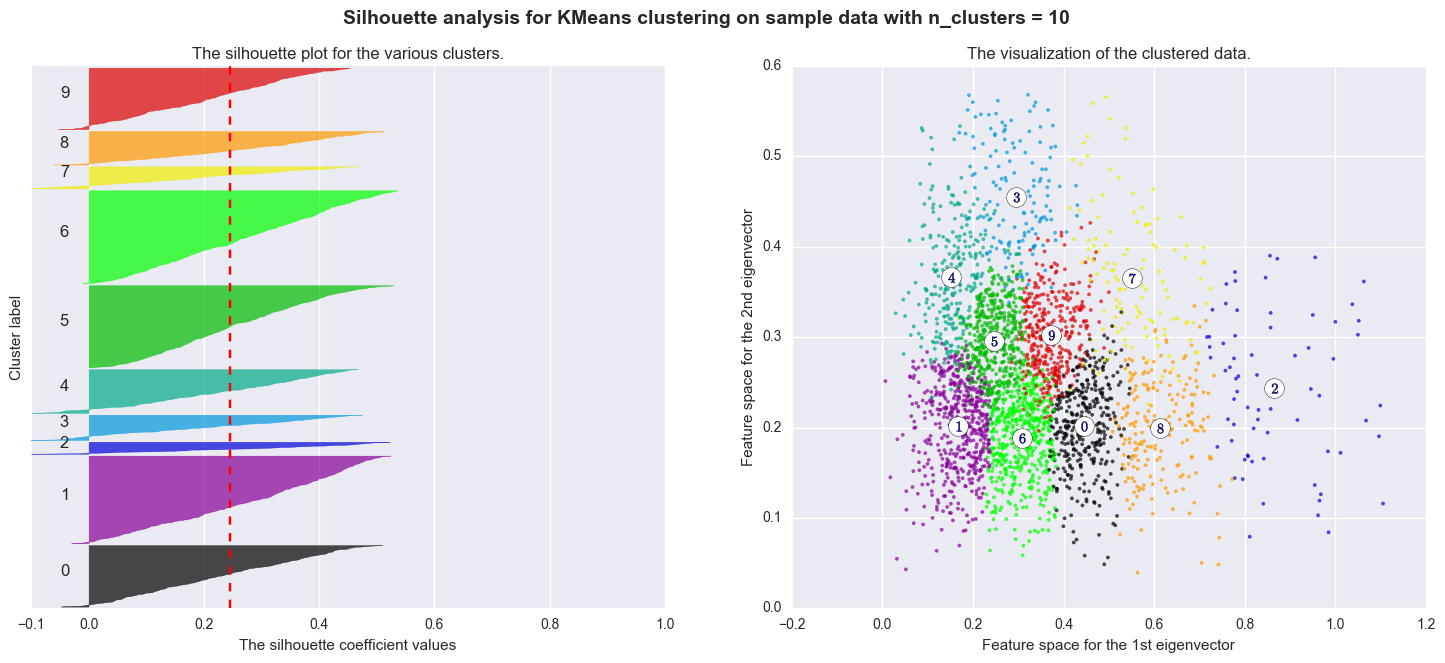

In [280]:
### SILHOUETTE ANALYSIS

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


range_n_clusters = [3, 4, 5, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++')
    cluster_labels = clusterer.fit(data).labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
   
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st eigenvector")
    ax2.set_ylabel("Feature space for the 2nd eigenvector")


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

So far 4 clusters seems like a reasonable choice. Other clusters produces more than one outlier cluster. Further validation needed. (elbow method)

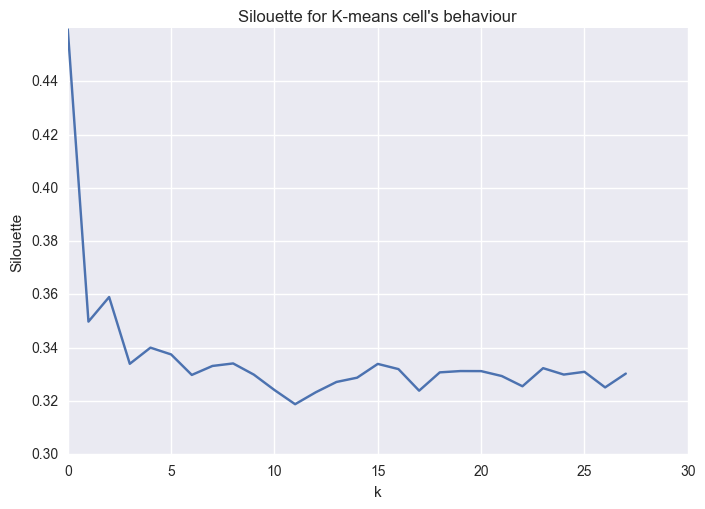

In [281]:
### Silhoette

s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_data)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(reduced_data, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()
plt.show()

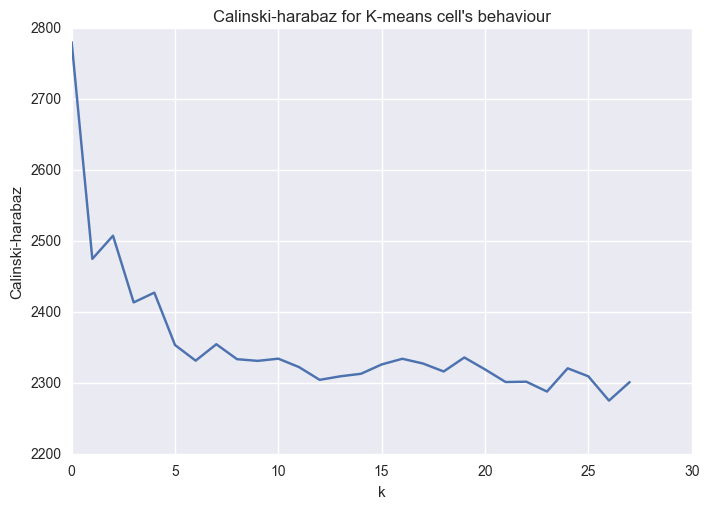

In [282]:
### Calinski-Harabaz

s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_data)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(metrics.calinski_harabaz_score(reduced_data, labels))

plt.plot(s)
plt.ylabel("Calinski-harabaz")
plt.xlabel("k")
plt.title("Calinski-harabaz for K-means cell's behaviour")
sns.despine()
plt.show()


In [283]:
### Elbow method definition.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

def elbow(X, n):
    kMeansVar = [KMeans(n_clusters=k).fit(X) for k in range(2, n)] # Fit k means for each cluster
    centroids = [C.cluster_centers_ for C in kMeansVar] # Get the cluster centers
    k_euclid = [cdist(X, cent) for cent in centroids] # Euclidean distance from each point to cluster center
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist] # Within sum of squares
    tss = sum(pdist(X)**2)/X.shape[0] # Total sum of squares
    bss = tss - wcss # Between sum of squares
    plt.ylabel('Between Sum of Squares')
    plt.xlabel('Number of clusters')
    plt.plot(bss)
    plt.show()

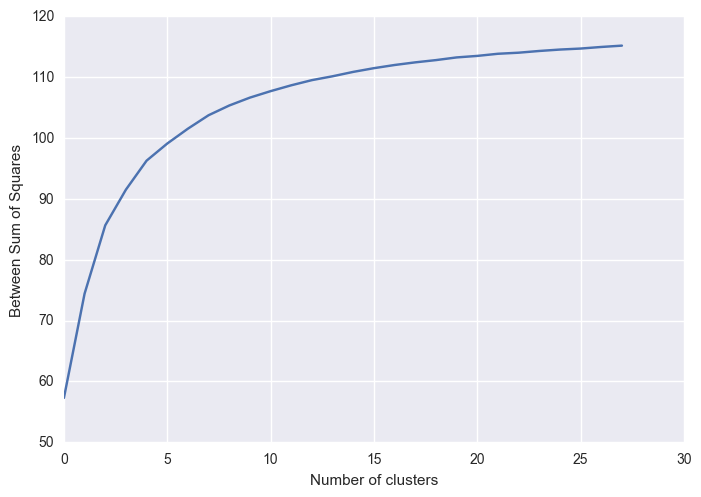

In [284]:
elbow(reduced_data, 30)

Marginal increase in between sum-of squares drops significantly at arround 4 clusters. 4 Clusters seem like a reasonable choice. 

In [285]:
### Get summary table for chosen k=4


print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia   silhouette   calinski-harabaz')

bench_k_means(KMeans(init='random', n_clusters=4, n_init=10), name='Random', data=reduced_data) # Random intialization

bench_k_means(KMeans(init='k-means++', n_clusters=4, n_init=10), name='KMeans++', data=reduced_data) # Further away initialization

print(79 * '_')



n_samples 3073, 	 n_features 2
_______________________________________________________________________________
init    time  inertia   silhouette   calinski-harabaz
   Random  0.15s  34  0.360 2507.815
 KMeans++  0.18s  34  0.342 2507.794
_______________________________________________________________________________


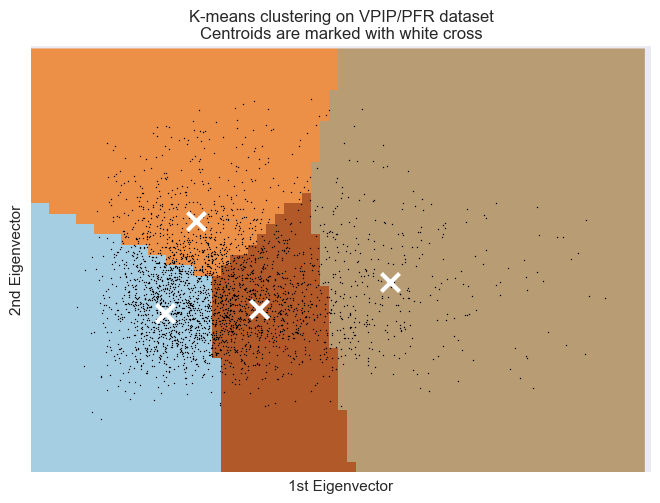

In [286]:
### Voronoi diagrams.


kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .02 # Step size decrease to increase the quality of the VQ.(point in the mesh)

## Plotting decision boundary for which colour will be assigned
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


## Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

## Plot the rsult on colour map.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on VPIP/PFR dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('1st Eigenvector')
plt.ylabel('2nd Eigenvector')
plt.xticks(())
plt.yticks(())
plt.show()

In [287]:
### EXPORT FOR VIZUALIZATION

labels = kmeans.labels_

data['Cluster_NEW']= kmeans.labels_

data.to_csv('data_NEW.csv')

In [289]:
data1 = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\DATA_borer.csv')
data2 = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\DATA_ME.csv')
data3 = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\DATA_NEW.csv')
data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\data.csv')
data.reset_index(inplace=True)

dfc1 = data1['Cluster_Borer']
dfc2 = data2['Cluster_ME']
dfc3 = data3['Cluster_NEW']
lst=[data, dfc1, dfc2, dfc3]

data_full = pd.concat(lst, axis=1, join='inner', verify_integrity=True )



In [290]:
data_full.to_csv('data_full.csv')

In [297]:
### Need to take care of outliers in profit metrics. (and possibly get transfromation on proportion of winners for each cluster)
## OUTLIERS in profits

dataf = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\data_full.csv')

dataf['isOutlierProfH'] = np.where(abs(dataf['PROFIT_per_VHAND'] - dataf['PROFIT_per_VHAND'].mean()) > 3 * dataf['PROFIT_per_VHAND'].std(), np.nan, 0)
dataf['isOutlierProfT'] = np.where(abs(dataf['TOTAL_PROFIT'] - dataf['TOTAL_PROFIT'].mean()) > 3 * dataf['TOTAL_PROFIT'].std(), np.nan, 0)

print(dataf.shape[0] - dataf.count())

Unnamed: 0          0
level_0             0
Unnamed: 0.1        0
index               0
NAME_ID             0
AGRO_N              0
PASS_N              0
DECEPT_N            0
STAGES_N            0
AF                  0
VPIP                0
PFR                 0
DECEPT              0
COMMPROP            0
PROFIT_per_VHAND    0
TOTAL_PROFIT        0
HANDn_PLAYER        0
POS_mean            0
PLAYERSn_mean       0
POS_to_N            0
WINNER              0
LOOSER              0
WTSHWD              0
Cluster_Borer       0
Cluster_ME          0
Cluster_NEW         0
isOutlierProfH      5
isOutlierProfT      4
dtype: int64


In [299]:
dataf.dropna(how='any', axis=0, inplace=True)

In [315]:
### WINNERS PROPORTION

dataf=dataf.reset_index()
dataf=dataf.set_index('Cluster_Borer')
dataf['WIN_PROP_BORER']=dataf['WINNER'].groupby(level=0).transform('sum')/dataf['WINNER'].groupby(level=0).transform('count')

dataf=dataf.reset_index()
dataf=dataf.set_index('Cluster_ME')
dataf['WIN_PROP_ME']=dataf['WINNER'].groupby(level=0).transform('sum')/dataf['WINNER'].groupby(level=0).transform('count')

dataf=dataf.reset_index()
dataf=dataf.set_index('Cluster_NEW')
dataf['WIN_PROP_NEW']=dataf['WINNER'].groupby(level=0).transform('sum')/dataf['WINNER'].groupby(level=0).transform('count')

In [319]:
### Drop irrelevant stuff

dataf.drop(['Unnamed: 0', 'level_0', 'index', 'Unnamed: 0.1'], inplace=True, axis=1)

In [321]:
dataf = dataf.reset_index()

In [322]:
dataf.to_csv('dataf.csv')

In [ ]:
### ANOVA (AFTER DATA EXPLORATION PCM in tableau)
### If homogeneity not satisfied Welch's t-test used.
### If normality not satisfied use Box-Cox transformation.
### IID observations is third assumption which could be assumed here.
### If all fail pass it to Random Forrest.


### 2.4 Evaluation 

ANOVA (testing for similarity of means in different clusters)

1. IID obsertvations. This assumptions is implicitly taken as satisfied, as each observation is seperate individual. Characteristics were calculated from extend period of time. (CHECKED)

2. Normality test. Use scipy.normal test for each group, if not satisfied transform with Box-Cox. (WILL BE CHECKED)

3. Homogeneity. Use scipy.barlett test for eacch group, if not satisfied use Welch's t-test. (WILL BE CHECKED)



In [ ]:
### Data read

data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\dataf.csv')


In [326]:
### Data prep (create seperate samples for each cluster (each clustering))

data = data.loc[:,['PROFIT_per_VHAND', 'Cluster_Borer', 'Cluster_ME','Cluster_NEW']]

data_borer0 = data[data['Cluster_Borer']==0]
borer0 = data_borer0['PROFIT_per_VHAND']
data_borer1 =data[data['Cluster_Borer']==1]
borer1 = data_borer1['PROFIT_per_VHAND']
data_borer2 =data[data['Cluster_Borer']==2]
borer2 = data_borer2['PROFIT_per_VHAND']
data_borer3 =data[data['Cluster_Borer']==3]
borer3 = data_borer3['PROFIT_per_VHAND']

data_ME0 = data[data['Cluster_ME']==0]
ME0 = data_ME0['PROFIT_per_VHAND']
data_ME1 = data[data['Cluster_ME']==1]
ME1 = data_ME1['PROFIT_per_VHAND']
data_ME2 = data[data['Cluster_ME']==2]
ME2 = data_ME2['PROFIT_per_VHAND']
data_ME3 = data[data['Cluster_ME']==3]
ME3 = data_ME3['PROFIT_per_VHAND']

data_NEW0 = data[data['Cluster_NEW']==0]
NEW0 = data_NEW0['PROFIT_per_VHAND']
data_NEW1 = data[data['Cluster_NEW']==1]
NEW1 = data_NEW1['PROFIT_per_VHAND']
data_NEW2 = data[data['Cluster_NEW']==2]
NEW2 = data_NEW2['PROFIT_per_VHAND']
data_NEW3 = data[data['Cluster_NEW']==3]
NEW3 = data_NEW3['PROFIT_per_VHAND']

In [ ]:
### Tests for normality

import scipy.stats as stats

res_b0 = stats.normaltest(borer0)
res_b1 = stats.normaltest(borer1)
res_b2 = stats.normaltest(borer2)
res_b3 = stats.normaltest(borer3)

res_M0 = stats.normaltest(ME0)
res_M1 = stats.normaltest(ME1)
res_M2 = stats.normaltest(ME2)
res_M3 = stats.normaltest(ME3)

res_N0 = stats.normaltest(NEW0)
res_N1 = stats.normaltest(NEW1)
res_N2 = stats.normaltest(NEW2)
res_N3 = stats.normaltest(NEW3)


res_b = [res_b0, res_b1, res_b2, res_b3]
res_m = [res_M0, res_M1, res_M2, res_M3]
res_n = [res_N0, res_N1, res_N2, res_N3]


In [332]:
print('Normality test results for Borers clustering: ', res_b)
print(80 * '-')
print('Normality test results for My clustering', res_m)
print(80 * '-')
print('Normality test results for NEW clustering', res_n)


Normality test results for Borers clustering:  [NormaltestResult(statistic=384.61845139831661, pvalue=3.0280598846405768e-84), NormaltestResult(statistic=400.67824879056008, pvalue=9.8587934029065097e-88), NormaltestResult(statistic=111.58925199003168, pvalue=5.8708611686558403e-25), NormaltestResult(statistic=407.510075720423, pvalue=3.2382576287765307e-89)]
--------------------------------------------------------------------------------
Normality test results for My clustering [NormaltestResult(statistic=197.14044792708364, pvalue=1.5541597333897164e-43), NormaltestResult(statistic=88.4468542239985, pvalue=6.223140904594407e-20), NormaltestResult(statistic=323.75158588581451, pvalue=4.9915608661014138e-71), NormaltestResult(statistic=328.27149962652379, pvalue=5.2089426156089646e-72)]
--------------------------------------------------------------------------------
Normality test results for NEW clustering [NormaltestResult(statistic=197.14044792708364, pvalue=1.5541597333897164e-43),

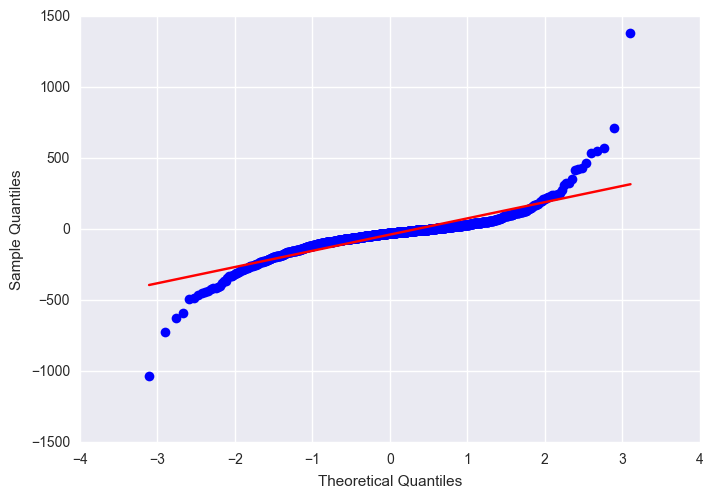

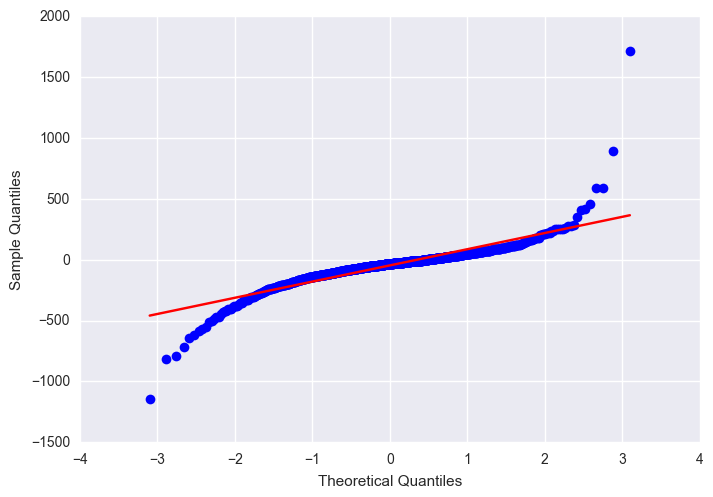

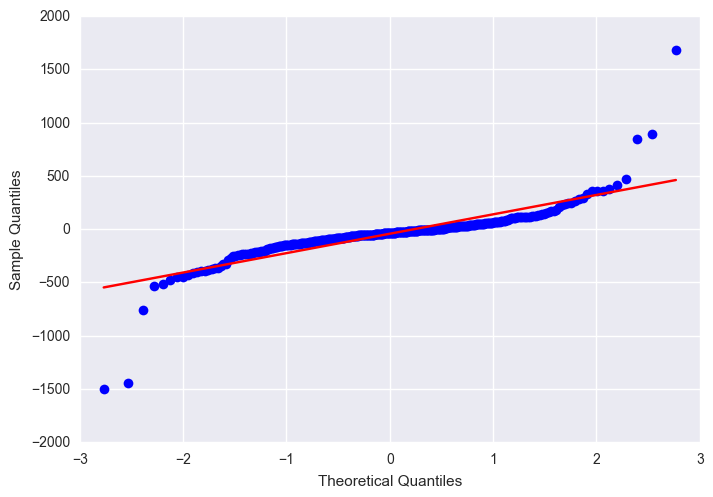

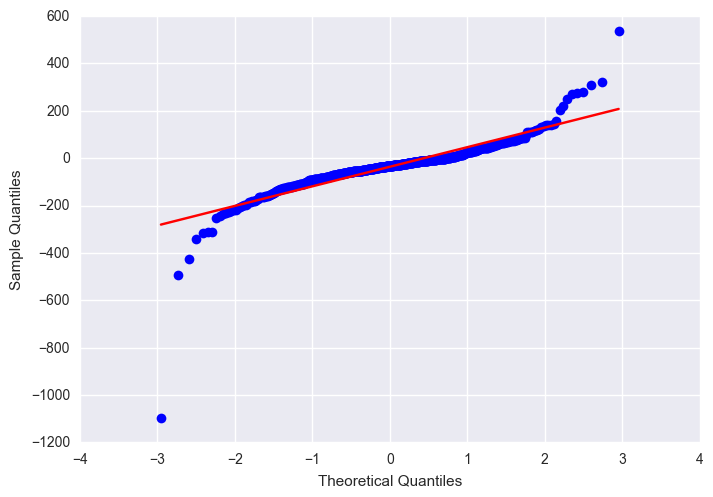

In [336]:
### QQ plots

fig = sm.qqplot(borer0, stats.norm, line = 'r')
plt.show()
fig = sm.qqplot(borer1, stats.norm, line = 'r')
plt.show()
fig = sm.qqplot(borer2, stats.norm, line = 'r')
plt.show()
fig= sm.qqplot(borer3, stats.norm, line = 'r')
plt.show()

Both normality tests, as well as qq plots (enough to test only with one clustering) indicate non-normality

In [338]:
### Tests for homogeneity. 


res_b = stats.levene(borer0, borer1, borer2, borer3)

res_M = stats.levene(ME0, ME1, ME2, ME3)

res_N = stats.levene(NEW0, NEW1, NEW2, NEW3)


In [339]:
print('Homogeneity test results for Borers clustering: ', res_b)
print(80 * '-')
print('Homogeneity test results for My clustering', res_M)
print(80 * '-')
print('Homogeneity test results for NEW clustering', res_N)


Homogeneity test results for Borers clustering:  LeveneResult(statistic=24.111467716733515, pvalue=2.0322161795648541e-15)
--------------------------------------------------------------------------------
Homogeneity test results for My clustering LeveneResult(statistic=6.3866786027579243, pvalue=0.00026025735947322773)
--------------------------------------------------------------------------------
Homogeneity test results for NEW clustering LeveneResult(statistic=6.3866786027579243, pvalue=0.00026025735947322773)


Homogeneity assumption is violated as well. Procceed with ''box-cox'' transformations and ''welch'' statistics.

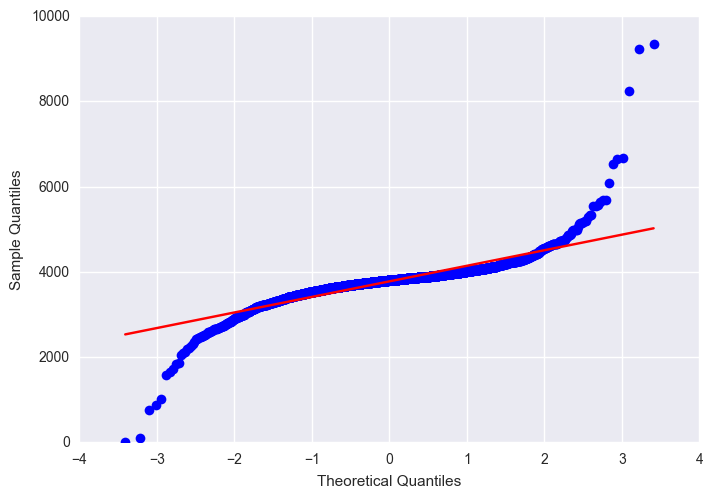

In [348]:
### Box-Cox transfromation to normality

from scipy import stats
from scipy.stats import boxcox

PROFIT_PRBOX= data['PROFIT_per_VHAND']+abs(data['PROFIT_per_VHAND'].min())+1
PROFIT_POSBOX, lambda1 = boxcox(PROFIT_PRBOX)

fig= sm.qqplot(PROFIT_POSBOX, stats.norm, line = 'r')
plt.show()



In [345]:
### Create an adjusted zero array to test for deviation from zero

ZEROMEAN_POSBOX = abs(data['PROFIT_per_VHAND'].min())+1

In [346]:
### Put it back into dataframe

data['PROFIT_POSBOX'] = PROFIT_POSBOX
data['ZEROMEAN_POSBOX'] = ZEROMEAN_POSBOX

In [351]:
### Take the slices of data corresponding to different clusters (posbox)

data_borer0 = data[data['Cluster_Borer']==0]
borer0 = data_borer0['PROFIT_POSBOX']
data_borer1 =data[data['Cluster_Borer']==1]
borer1 = data_borer1['PROFIT_POSBOX']
data_borer2 =data[data['Cluster_Borer']==2]
borer2 = data_borer2['PROFIT_POSBOX']
data_borer3 =data[data['Cluster_Borer']==3]
borer3 = data_borer3['PROFIT_POSBOX']

data_ME0 = data[data['Cluster_ME']==0]
ME0 = data_ME0['PROFIT_POSBOX']
data_ME1 = data[data['Cluster_ME']==1]
ME1 = data_ME1['PROFIT_POSBOX']
data_ME2 = data[data['Cluster_ME']==2]
ME2 = data_ME2['PROFIT_POSBOX']
data_ME3 = data[data['Cluster_ME']==3]
ME3 = data_ME3['PROFIT_POSBOX']

data_NEW0 = data[data['Cluster_NEW']==0]
NEW0 = data_NEW0['PROFIT_POSBOX']
data_NEW1 = data[data['Cluster_NEW']==1]
NEW1 = data_NEW1['PROFIT_POSBOX']
data_NEW2 = data[data['Cluster_NEW']==2]
NEW2 = data_NEW2['PROFIT_POSBOX']
data_NEW3 = data[data['Cluster_NEW']==3]
NEW3 = data_NEW3['PROFIT_POSBOX']

In [352]:
res_b0 = stats.normaltest(borer0)
res_b1 = stats.normaltest(borer1)
res_b2 = stats.normaltest(borer2)
res_b3 = stats.normaltest(borer3)

res_b = [res_b0, res_b1, res_b2, res_b3]

print('Normality test results for Borers clustering: ', res_b)


Normality test results for Borers clustering:  [NormaltestResult(statistic=481.27340722124404, pvalue=3.1103372279987723e-105), NormaltestResult(statistic=528.42483097909894, pvalue=1.7947580194838141e-115), NormaltestResult(statistic=161.00902543584766, pvalue=1.0897687708127145e-35), NormaltestResult(statistic=339.15950656861344, pvalue=2.2513805306841664e-74)]


We failed to transform data to approximately normal data. Box-cox actually produced even more significant test results than original data. We attempt to reduce the number of outliers even more.

In [354]:
### Take down outliers.

data['isOutlierProf'] = np.where(abs(data['PROFIT_per_VHAND'] - data['PROFIT_per_VHAND'].mean()) > 2 * data['PROFIT_per_VHAND'].std(), np.nan, 0)

print(data.shape[0] - data.count())

PROFIT_per_VHAND      0
Cluster_Borer         0
Cluster_ME            0
Cluster_NEW           0
PROFIT_POSBOX         0
ZEROMEAN_POSBOX       0
isOutlierProf       137
dtype: int64


In [355]:
data.dropna(how='any', axis=0, inplace=True)

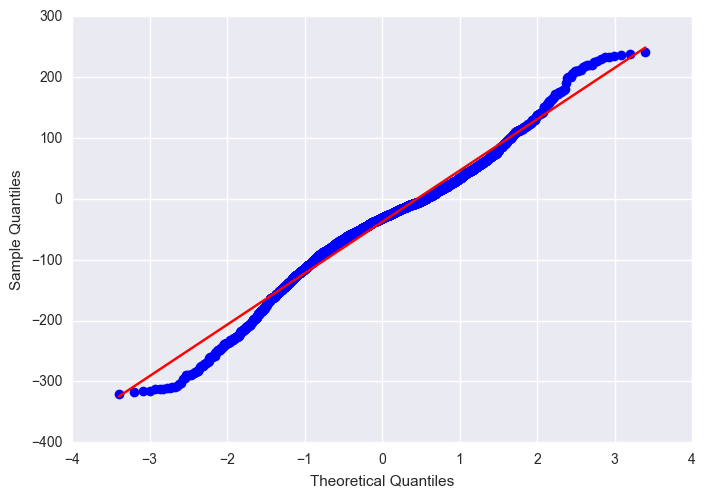

In [356]:
### Test for normality again.

fig= sm.qqplot(data['PROFIT_per_VHAND'], stats.norm, line = 'r')
plt.show()

In [357]:
result = stats.normaltest(data['PROFIT_per_VHAND'])

print(result)

NormaltestResult(statistic=92.662293543184859, pvalue=7.5620338461796402e-21)


In [358]:
PROFIT_PRBOX= data['PROFIT_per_VHAND']+abs(data['PROFIT_per_VHAND'].min())+1
PROFIT_POSBOX, lambda1 = boxcox(PROFIT_PRBOX)


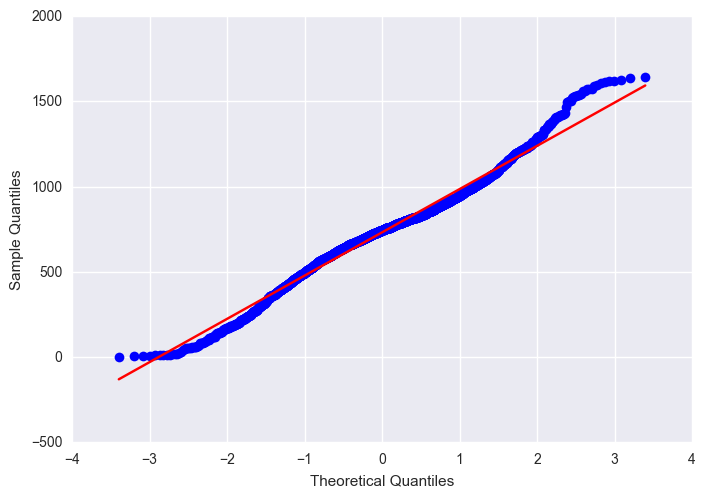

In [359]:
fig= sm.qqplot(PROFIT_POSBOX, stats.norm, line = 'r')
plt.show()

In [360]:
result2 = stats.normaltest(PROFIT_POSBOX)

print(result2)

NormaltestResult(statistic=53.943369144302238, pvalue=1.933509110117031e-12)


In [361]:
w, p = stats.shapiro(PROFIT_POSBOX)

print(w, p)

0.9834988713264465 5.620619883994225e-18


Non-normality had been reduced , however shapiro-wilko and dagostino tests still points to significant deviations from normality. However, we still procceed. Goal is to compare three different clusterings, rather than deduce actual maginitutdes at this point.

In [379]:
### Get data into data-frame
data['PROFIT_POSBOX'] = PROFIT_POSBOX
data['ZEROMEAN_POSBOX'] = ZEROMEAN_POSBOX

data_borer0 = data[data['Cluster_Borer']==0]
borer0 = data_borer0['PROFIT_POSBOX']
data_borer1 =data[data['Cluster_Borer']==1]
borer1 = data_borer1['PROFIT_POSBOX']
data_borer2 =data[data['Cluster_Borer']==2]
borer2 = data_borer2['PROFIT_POSBOX']
data_borer3 =data[data['Cluster_Borer']==3]
borer3 = data_borer3['PROFIT_POSBOX']

data_ME0 = data[data['Cluster_ME']==0]
ME0 = data_ME0['PROFIT_POSBOX']
data_ME1 = data[data['Cluster_ME']==1]
ME1 = data_ME1['PROFIT_POSBOX']
data_ME2 = data[data['Cluster_ME']==2]
ME2 = data_ME2['PROFIT_POSBOX']
data_ME3 = data[data['Cluster_ME']==3]
ME3 = data_ME3['PROFIT_POSBOX']

data_NEW0 = data[data['Cluster_NEW']==0]
NEW0 = data_NEW0['PROFIT_POSBOX']
data_NEW1 = data[data['Cluster_NEW']==1]
NEW1 = data_NEW1['PROFIT_POSBOX']
data_NEW2 = data[data['Cluster_NEW']==2]
NEW2 = data_NEW2['PROFIT_POSBOX']
data_NEW3 = data[data['Cluster_NEW']==3]
NEW3 = data_NEW3['PROFIT_POSBOX']

In [365]:
### Multiple welch tests. (Borer)


t01, p01 = stats.ttest_ind(borer0, borer1, axis=0, equal_var=False)
t02, p02 = stats.ttest_ind(borer0, borer2, axis=0, equal_var=False)
t03, p03 = stats.ttest_ind(borer0, borer3, axis=0, equal_var=False)
t12, p12 = stats.ttest_ind(borer1, borer2, axis=0, equal_var=False)
t13, p13 = stats.ttest_ind(borer1, borer3, axis=0, equal_var=False)
t23, p23 = stats.ttest_ind(borer2, borer3, axis=0, equal_var=False)

Borer_WelchLst = [(t01, p01), (t02, p02), (t03, p03), (t12, p12), (t13, p13), (t23, p23)]

In [366]:
Borer_WelchLst 

[(0.73573874268465367, 0.46197829501535537),
 (-0.10096835481804171, 0.91961737838760649),
 (0.16247049711825789, 0.87095712492828481),
 (-0.57777866796099531, 0.56365903967796549),
 (-0.56873975958434264, 0.56961462702573629),
 (0.20345071161772724, 0.83886675684192091)]

Mean per voluntary hand profit is not statistically different for Borer clusters. (alpha = 0.01)

In [371]:
### Multiple welch tests. (ME)


t01, p01 = stats.ttest_ind(ME0, ME1, axis=0, equal_var=False)
t02, p02 = stats.ttest_ind(ME0, ME2, axis=0, equal_var=False)
t03, p03 = stats.ttest_ind(ME0, ME3, axis=0, equal_var=False)
t12, p12 = stats.ttest_ind(ME1, ME2, axis=0, equal_var=False)
t13, p13 = stats.ttest_ind(ME1, ME3, axis=0, equal_var=False)
t23, p23 = stats.ttest_ind(ME2, ME3, axis=0, equal_var=False)

ME_WelchLst = [(t01, p01), (t02, p02), (t03, p03), (t12, p12), (t13, p13), (t23, p23)]

In [372]:
ME_WelchLst

[(4.4984493951440072, 8.9295585037514427e-06),
 (1.7469384719381824, 0.080830570200784407),
 (4.3430631653827803, 1.4860247908156458e-05),
 (-2.9621147589952224, 0.0031999003788666801),
 (-1.4204093583575206, 0.15621131451308773),
 (2.1561681276660116, 0.031223176123854213)]

Mean per voluntary hand is profit is significantly different between 0 and 1, 0 and 3; 1 and 2. In ME clustering. (alpha = 0.01)

In [380]:
### Multiple welch tests. (NEW)

t01, p01 = stats.ttest_ind(NEW0, NEW1, axis=0, equal_var=False)
t02, p02 = stats.ttest_ind(NEW0, NEW2, axis=0, equal_var=False)
t03, p03 = stats.ttest_ind(NEW0, NEW3, axis=0, equal_var=False)
t12, p12 = stats.ttest_ind(NEW1, NEW2, axis=0, equal_var=False)
t13, p13 = stats.ttest_ind(NEW1, NEW3, axis=0, equal_var=False)
t23, p23 = stats.ttest_ind(NEW2, NEW3, axis=0, equal_var=False)

NEW_WelchLst = [(t01, p01), (t02, p02), (t03, p03), (t12, p12), (t13, p13), (t23, p23)]

In [381]:
NEW_WelchLst

[(0.11807909439341853, 0.90605561343359209),
 (0.73498178000648096, 0.46246603054808677),
 (0.90280964485945114, 0.3667381868915327),
 (0.34533728727641294, 0.72999263941207726),
 (0.46706573336509671, 0.6406506911746318),
 (0.19348851997874375, 0.84660200837674859)]

Mean per voluntary hand profit is not significantly different for different clusters in NEW clustering. 

In [384]:
### Go back to old data scale. (prebox)

data_borer0 = data[data['Cluster_Borer']==0]
borer0 = data_borer0['PROFIT_per_VHAND']
data_borer1 =data[data['Cluster_Borer']==1]
borer1 = data_borer1['PROFIT_per_VHAND']
data_borer2 =data[data['Cluster_Borer']==2]
borer2 = data_borer2['PROFIT_per_VHAND']
data_borer3 =data[data['Cluster_Borer']==3]
borer3 = data_borer3['PROFIT_per_VHAND']

data_ME0 = data[data['Cluster_ME']==0]
ME0 = data_ME0['PROFIT_per_VHAND']
data_ME1 = data[data['Cluster_ME']==1]
ME1 = data_ME1['PROFIT_per_VHAND']
data_ME2 = data[data['Cluster_ME']==2]
ME2 = data_ME2['PROFIT_per_VHAND']
data_ME3 = data[data['Cluster_ME']==3]
ME3 = data_ME3['PROFIT_per_VHAND']

data_NEW0 = data[data['Cluster_NEW']==0]
NEW0 = data_NEW0['PROFIT_per_VHAND']
data_NEW1 = data[data['Cluster_NEW']==1]
NEW1 = data_NEW1['PROFIT_per_VHAND']
data_NEW2 = data[data['Cluster_NEW']==2]
NEW2 = data_NEW2['PROFIT_per_VHAND']
data_NEW3 = data[data['Cluster_NEW']==3]
NEW3 = data_NEW3['PROFIT_per_VHAND']

In [385]:
### Mean Profit per volunatary hand (borer after outliers >2sd)

BorerMean_Lst = [borer0.mean(), borer1.mean(), borer2.mean(), borer3.mean()]

BorerMean_Lst 

[-37.10836150774747,
 -40.558774673210415,
 -37.05600544519841,
 -36.77856695127315]

In [388]:
### Mean Profit per volunatary hand (ME after outliers >2sd)

MEMean_Lst = [ME0.mean(), ME1.mean(), ME2.mean(), ME3.mean()]

MEMean_Lst 

[-29.946147046463768,
 -53.213812402668836,
 -37.660530880537024,
 -45.69655016471533]

In [389]:
### Mean Profit per volunatary hand (NEW after outliers >2sd)

NEWMean_Lst = [NEW0.mean(), NEW1.mean(), NEW2.mean(), NEW3.mean()]

NEWMean_Lst 

[-36.38049954396113,
 -37.561671473867804,
 -38.080259049517885,
 -40.385698184147266]

In [390]:
### MEAN Profit per voluntary hand (for all clusters outliers > 3sd)

data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\dataf.csv')


In [391]:
data_borer0 = data[data['Cluster_Borer']==0]
borer0 = data_borer0['PROFIT_per_VHAND']
data_borer1 =data[data['Cluster_Borer']==1]
borer1 = data_borer1['PROFIT_per_VHAND']
data_borer2 =data[data['Cluster_Borer']==2]
borer2 = data_borer2['PROFIT_per_VHAND']
data_borer3 =data[data['Cluster_Borer']==3]
borer3 = data_borer3['PROFIT_per_VHAND']

data_ME0 = data[data['Cluster_ME']==0]
ME0 = data_ME0['PROFIT_per_VHAND']
data_ME1 = data[data['Cluster_ME']==1]
ME1 = data_ME1['PROFIT_per_VHAND']
data_ME2 = data[data['Cluster_ME']==2]
ME2 = data_ME2['PROFIT_per_VHAND']
data_ME3 = data[data['Cluster_ME']==3]
ME3 = data_ME3['PROFIT_per_VHAND']

data_NEW0 = data[data['Cluster_NEW']==0]
NEW0 = data_NEW0['PROFIT_per_VHAND']
data_NEW1 = data[data['Cluster_NEW']==1]
NEW1 = data_NEW1['PROFIT_per_VHAND']
data_NEW2 = data[data['Cluster_NEW']==2]
NEW2 = data_NEW2['PROFIT_per_VHAND']
data_NEW3 = data[data['Cluster_NEW']==3]
NEW3 = data_NEW3['PROFIT_per_VHAND']

In [392]:
BorerMean_Lst = [borer0.mean(), borer1.mean(), borer2.mean(), borer3.mean()]

MEMean_Lst = [ME0.mean(), ME1.mean(), ME2.mean(), ME3.mean()]

NEWMean_Lst = [NEW0.mean(), NEW1.mean(), NEW2.mean(), NEW3.mean()]

print(BorerMean_Lst)
print(80 * '-')
print(MEMean_Lst)
print(80 * '-')
print(NEWMean_Lst)
print(80 * '-')

[-38.01313412227028, -47.26676214723933, -42.45163920217924, -36.320016996365936]
--------------------------------------------------------------------------------
[-33.33428485226889, -56.9904350429438, -39.24609821083857, -49.87672185250088]
--------------------------------------------------------------------------------
[-36.96853557448074, -43.01514709048965, -35.314779855477795, -48.88881412525648]
--------------------------------------------------------------------------------


In [394]:
print(data['PROFIT_per_VHAND'].mean())

-41.2690908300517


Increase in the outlier threshold does not significantly increase the mean for different clusters. Means for all clusters do not differ substantially from population mean ( < 10 points). Except for 1st cluster in ME clustering, has mean of -57, which substantially smaller than population. Also, 0 cluster in ME clustering, has mean of -29 (outliers > 2*sd) mean of -33 (outliers > 3*sd). Suggesting that something interesting about a winning player could be found on 0 cluster, and loosing player on 1st cluster in ME clustering. (compare together with proportion of players)

In [399]:
### Investigate features for theese two clusters.

data_ME0 = data_ME0.loc[:,['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WTSHWD']]
data_ME1 = data_ME1.loc[:,['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WTSHWD']]
data_d = data.loc[:,['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WTSHWD']]

In [397]:
data_ME0.describe()

,AF,VPIP,PFR,DECEPT,COMMPROP,WTSHWD
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,0.330219,0.252018,0.085232,0.007764,0.020571,0.121549
std,0.157110,0.068985,0.061987,0.004978,0.013876,0.013110
min,0.032967,0.048705,0.000000,0.000000,0.000510,0.097744
25%,0.219657,0.205709,0.038942,0.004269,0.009812,0.110400
50%,0.301932,0.248109,0.073171,0.006814,0.017480,0.120598
75%,0.403321,0.300000,0.114057,0.010566,0.027893,0.132743
max,1.067797,0.488722,0.384279,0.024580,0.079891,0.147303


In [398]:
data_ME1.describe()

,AF,VPIP,PFR,DECEPT,COMMPROP,WTSHWD
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,0.285968,0.363720,0.125619,0.007248,0.036276,0.237549
std,0.139110,0.112865,0.095506,0.005188,0.018058,0.028292
min,0.080268,0.109589,0.000000,0.000000,0.001871,0.200772
25%,0.181353,0.277117,0.050807,0.003242,0.022583,0.216181
50%,0.265664,0.367521,0.104651,0.006357,0.033353,0.230478
75%,0.357427,0.449756,0.176180,0.010449,0.051004,0.249595
max,0.916201,0.568000,0.402647,0.024390,0.079393,0.350000


In [401]:
data_d.describe()

,AF,VPIP,PFR,DECEPT,COMMPROP,WTSHWD
count,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000
mean,0.326946,0.259442,0.089078,0.007599,0.022808,0.131193
std,0.161517,0.090684,0.071322,0.004993,0.015556,0.049176
min,0.006623,0.039400,0.000000,0.000000,0.000134,0.013514
25%,0.213684,0.195982,0.037996,0.003968,0.011067,0.096008
50%,0.299187,0.248110,0.072225,0.006718,0.019507,0.123640
75%,0.406382,0.315060,0.118613,0.010463,0.031236,0.159363
max,1.105263,0.568000,0.402743,0.024580,0.079891,0.350000


Agression slightly higher in ME0, VPIP is 50% larger in ME1, PFR 50% larger in ME1, Decept the same, Commprop 50% larger in ME1, and WTSHWD > 50% higher in ME1. Suggesting winning players leaning to tight-aggresive. Also, seems like competitiveness , and willingness to go to showdown is also a negative factor. More patient players seem to have better result. However, characteristics are not significantly different from population, also, clustering fails to find winning characteristics. (rather it contributes to finding a loosing 'little less' one.)

### 2.5 Supervised learning. (Random forrests)

In [405]:
data = pd.read_csv(r'C:\Users\Gedas\Desktop\INM433.Project\IPYTHON NOTEBOOK\dataf.csv')


In [406]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [409]:
x_train = data.loc[:, ['AF', 'VPIP', 'PFR', 'DECEPT', 'COMMPROP', 'WTSHWD', 'HANDn_PLAYER', 'POS_to_N']]

In [412]:
y_train = data['WINNER']

In [417]:
### 1st model run.

estimator_01 = RandomForestClassifier(n_estimators=100, max_features='sqrt', min_samples_split=2, min_samples_leaf=1)
model_01 = estimator_01.fit(x_train, y_train)

print(model_01.score(x_train, y_train))

1.0


Drastically overfitting. Returns 100% accuracy. Crossvalidated grid search will do its job.

In [418]:
### 1st cross validation

print (np.mean(cross_val_score(model_01, x_train, y_train, cv=10)))


0.747551143346


In [420]:
### 1st Grid Search

param_grid = {'n_estimators': [25, 100, 250], 'max_features': [1,'sqrt', 8], 'min_samples_leaf':[1,3,5], 'min_samples_split':[2,4,8]}

estimator_cvgrid = GridSearchCV(estimator=estimator_01, cv=10, param_grid=param_grid)
estimator_cvgrid.fit(x_train, y_train)

print(estimator_cvgrid.best_params_)
print(80 * '-')
print(estimator_cvgrid.best_score_)

{'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 25}
--------------------------------------------------------------------------------
0.7592954990215264


In [421]:
### 2nd model (best prameters)

estimator_02 = RandomForestClassifier(n_estimators=25, min_samples_leaf=3, min_samples_split=4, max_features='sqrt')
model_02 = estimator_02.fit(x_train, y_train)

C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

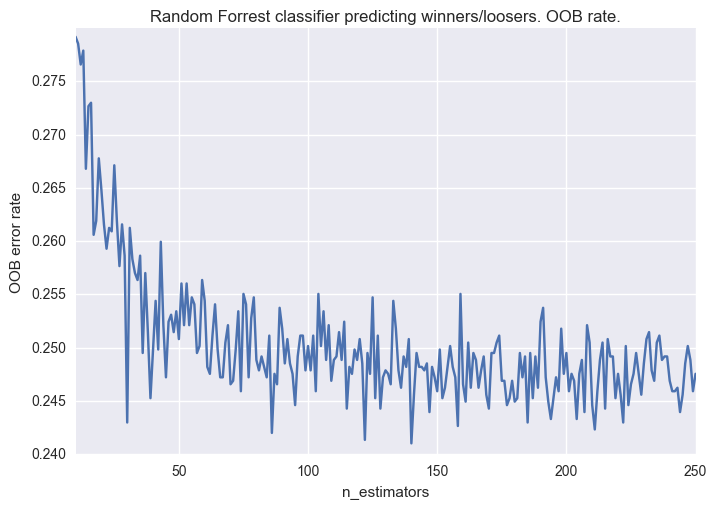

In [422]:
### OOB plot

from pylab import figure, axes, pie, title, show, savefig

min_estimators = 10
max_estimators = 250
error_rate=[]

for i in range(min_estimators, max_estimators + 1):
        estimator_02.set_params(n_estimators=i, oob_score=True, warm_start=False)
        estimator_02.fit(x_train, y_train)
        
        oob_error = 1 - estimator_02.oob_score_
        error_rate.append((i, oob_error))
        

plt.plot(*zip(*error_rate))

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.title('Random Forrest classifier predicting winners/loosers. OOB rate.')
plt.show()

savefig('OOB_01.png', bbox_inches='tight')

In [499]:
### 3rd model (best parameters + oob n_estimators)

estimator_03 = RandomForestClassifier(n_estimators=75, min_samples_leaf=5, min_samples_split=3, max_features='sqrt')
model_03 = estimator_03.fit(x_train, y_train)

print(model_03.score(x_train, y_train))

0.88682322244


In [500]:
### 4th model (best parameters + oob n_estimators + scaled down for convergence with cross validation)

estimator_04 = RandomForestClassifier(n_estimators=75, min_samples_leaf=13, min_samples_split=3, max_features='sqrt')
model_04 = estimator_04.fit(x_train, y_train)

print(model_04.score(x_train, y_train))

0.81441617743


In [427]:
### Plot learning curve

from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


C:\Users\Gedas\Anaconda2\envs\py35\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


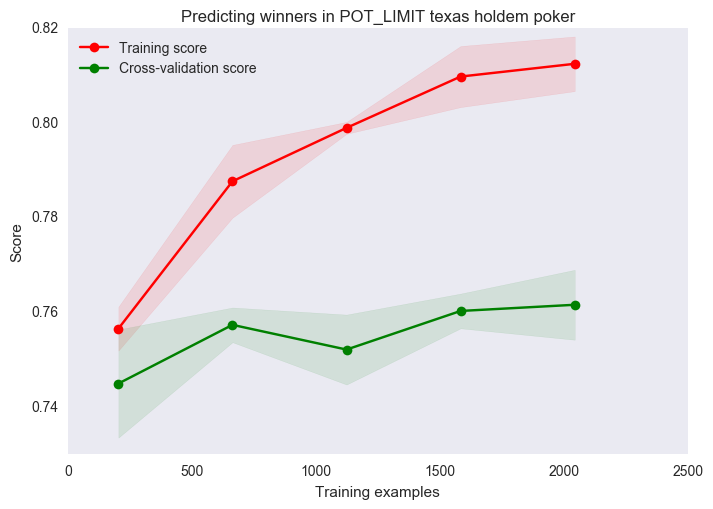

In [501]:
plot_learning_curve(estimator_04, 'Predicting winners in POT_LIMIT texas holdem poker', x_train, y_train)

plt.show()

savefig('learning_curve_2.png', bbox_inches='tight')


In [505]:
### CONFUSION MATRIX

y_pred = model_04.predict(x_train)
y_pred_prob = model_04.predict_proba(x_train)

from sklearn import metrics

print(metrics.confusion_matrix(y_train, y_pred, labels=None)) 
print(metrics.roc_auc_score(y_train, y_pred_prob[:,1]))

[[2062  107]
 [ 462  435]]
0.900846682734


In [506]:
print(metrics.classification_report(y_train,
                              y_pred))

             precision    recall  f1-score   support

          0       0.82      0.95      0.88      2169
          1       0.80      0.48      0.60       897

avg / total       0.81      0.81      0.80      3066



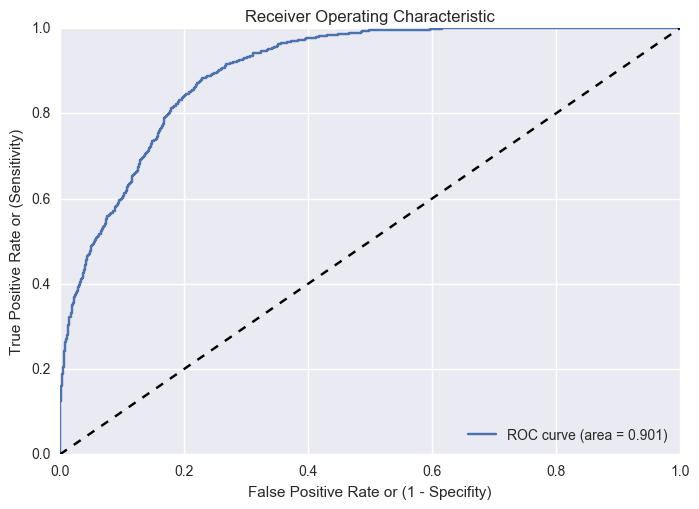

In [507]:
### AUC-ROC curve

from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob[:,1])
roc_auc = auc(fpr,  tpr, reorder=True)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

savefig('AUCROC_02.png', bbox_inches='tight')

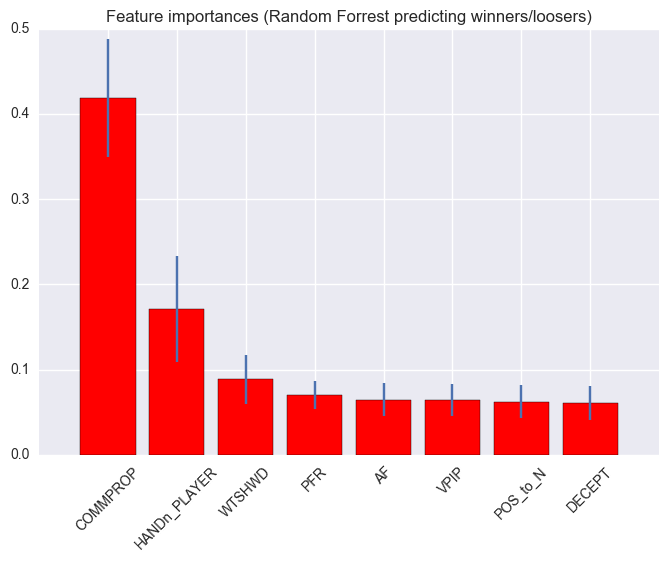

In [536]:
### Create a graph of feature importances.

importances = model_04.feature_importances_
x_features = list(x_train.columns.values)

std = np.std([tree.feature_importances_ for tree in model_03.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances (Random Forrest predicting winners/loosers)")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train[indices], rotation=45)
plt.xlim([-1, x_train.shape[1]])
plt.show()
savefig('feature_i_01.png', bbox_inches='tight')

In [509]:
### CONTRIBUTIONS

from treeinterpreter import treeinterpreter as ti

x_features = list(x_train.columns.values)

instances = x_train

prediction, bias, contributions = ti.predict(model_04, instances)
totalc = np.sum(contributions[:,:,1], axis=0) 

for c, feature in sorted(zip(totalc, 
                             x_features), reverse=True):
    print (feature, round(c, 5))

PFR 1.06275
HANDn_PLAYER 0.73342
VPIP 0.48666
POS_to_N 0.27535
DECEPT 0.17953
WTSHWD 0.15217
AF -0.29234
COMMPROP -2.46847


In [510]:
### CONTRIBUTIONS (mean)

totalsum = np.mean(contributions[:,:,1], axis=0) 

for lst, v in (sorted(zip(x_features, totalsum)))[:10]:
    print (lst, v)

AF -9.53484236923e-05
COMMPROP -0.000805109594924
DECEPT 5.85566620815e-05
HANDn_PLAYER 0.000239211369235
PFR 0.0003466233872
POS_to_N 8.98091418575e-05
VPIP 0.000158727597939
WTSHWD 4.96307473391e-05


In [511]:
### Create result data-frames

contributions_df = pd.DataFrame(contributions[:,:,1], columns=['AFc', 'VPIPc', 'PFRc', 'DECEPTc', 'COMMPROPc', 'WTSHWDc', 'HANDn_PLAYERc', 'POS_to_Nc'])

In [512]:
winner_pred = pd.DataFrame(y_pred_prob[:,1], columns=['Probability Winner'])

In [520]:
data_r = pd.merge(data, contributions_df, right_index=True, left_index=True, how='outer') ## FIRST TRANSFORMATION. COUNT NAME 

In [521]:
data_r = pd.merge(data, winner_pred, right_index=True, left_index=True, how='outer') # Merge

In [525]:
data_r['isPositiveAF'] = np.where(data_r['AFc'] > 0, 1, 0)
data_r['isPositivePFR'] =np.where(data_r['PFRc'] > 0, 1, 0)
data_r['isPositiveVPIP'] = np.where(data_r['VPIPc'] > 0, 1, 0)
data_r['isPositiveHand'] = np.where(data_r['HANDn_PLAYER'] > 0, 1, 0)
data_r['isPositivePosN'] = np.where(data_r['POS_to_N'] > 0, 1, 0)
data_r['isPositvieDecept'] = np.where(data_r['DECEPTc'] > 0, 1, 0)
data_r['isPositiveCommprop'] = np.where(data_r['COMMPROPc'] > 0, 1, 0)
data_r['isPositiveWtshwd'] = np.where(data_r['WTSHWDc'] > 0, 1, 0)

data_r['Probability Looser']=1-data_r['Probability Winner']

In [530]:
data_r['aboveAverageAF'] = np.where(data_r['AF'] > data_r['AF'].mean() , 1, 0)
data_r['aboveAveragePFR'] =np.where(data_r['PFR'] > data_r['PFR'].mean(), 1, 0)
data_r['aboveAverageVPIP'] = np.where(data_r['VPIP'] > data_r['VPIP'].mean(), 1, 0)
data_r['aboveAverageHand'] = np.where(data_r['HANDn_PLAYER'] > data_r['HANDn_PLAYER'].mean(), 1, 0)
data_r['aboveAveragePosN'] = np.where(data_r['POS_to_N'] > data_r['POS_to_N'].mean(), 1, 0)
data_r['aboveAverageDecept'] = np.where(data_r['DECEPT'] > data_r['DECEPT'].mean(), 1, 0)
data_r['aboveAverageCommprop'] = np.where(data_r['COMMPROP'] > data_r['COMMPROP'].mean(), 1, 0)
data_r['aboveAverageWtshwd'] = np.where(data_r['WTSHWD'] > data_r['WTSHWD'].mean(), 1, 0)

In [527]:
data_r.drop(['Unnamed: 0', 'isOutlierProfH', 'isOutlierProfT'], inplace=True, axis=1)

In [531]:
data_r.to_csv('data_r.csv')

In [529]:
importances_df.to_csv('importances.csv')

### DONE.